In [1]:
import sys
sys.path.append('../')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
from systematics_module import *

%matplotlib inline

%load_ext autoreload
%autoreload 2

## systematic test 

In [2]:
import numpy as np

In [3]:
from run_systematics import sys_iteration, fitting_SP, sys_ngal, weightmultiply, fitting_allSP, calling_sysMap, maskingCatalogSP

In [4]:
rootdir = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/'
inputdir = rootdir
figoutdir = inputdir+'/figure/'
sysoutdir = inputdir+'/sys/'
wdir = sysoutdir+'/weights/'
os.system('mkdir '+inputdir)
os.system('mkdir '+figoutdir)
os.system('mkdir '+sysoutdir)
os.system('mkdir '+wdir)
#os.system('cp ../data_txt/systematics/4th/systematic*_no_weight.txt '+inputdir+'/.')

256

In [5]:
# calling map 
GoldMask = callingEliGoldMask()
#GoldMask_st82 = Cuts.SpatialCuts(GoldMask, ra=320, ra2=360, dec=-2, dec2=2)
GoldMask_st82 = GoldMask[ GoldMask['DEC'] > -3.0 ]
GoldMask_spt = GoldMask[ GoldMask['DEC'] < -3.0 ]
#GoldMask_spt = cutcat20(GoldMask_spt)
#GoldMask_spt = Cuts.SpatialCuts(GoldMask_spt, ra=0, ra2 = 100, dec=-52, dec2 = -48)

pixarea = hp.nside2pixarea( 4096, degrees = True)
sptnpix = GoldMask_spt['PIXEL'].size #hp.get_map_size( GoldMask_spt['PIXEL'] )
st82npix =  GoldMask_st82['PIXEL'].size # hp.get_map_size( GoldMask_st82 )
SPTMaparea = pixarea * sptnpix
ST82Maparea = pixarea * st82npix

In [6]:
# import DMASS

#dmass = fitsio.read(rootdir+'spt.fits')
#dmass = io.SearchAndCallFits(path = rootdir, keyword='gold_spt_prob')
dmass = io.SearchAndCallFits(path = rootdir, keyword='dmass_spt_sys_v2.fits')
#dmass = dmass[dmass['EachProb_CMASS'] > 0.01]
print 'dmass sample size :', np.sum(dmass['EachProb_CMASS'])


#dmass = cutcat20(dmass)
#dmass_st82 = fitsio.read(rootdir+'dmass_st82_0004.fits')
dmass_st82 = io.SearchAndCallFits(path = rootdir, keyword='gold_st82_prob')
#dmass_st82 = dmass_st82[dmass_st82['EachProb_CMASS'] > 0.01]

cmass = fitsio.read(rootdir+'train_sample_des.fits')


print 'dmass st82 sample size :', np.sum(dmass_st82['EachProb_CMASS'])
print 'cmass sample size :', cmass.size


dmass = appendColumn(cat = dmass, name='WEIGHT', value=dmass['EachProb_CMASS'])
dmass_st82 = appendColumn(cat = dmass_st82, name='WEIGHT', value=dmass_st82['EachProb_CMASS'])
print np.sum(dmass['EachProb_CMASS']), np.sum(dmass_st82['EachProb_CMASS'])


--------------------------------
 calling catalog
--------------------------------
dmass_spt_sys_v2.fits
dmass sample size : 120874.72753482158

--------------------------------
 calling catalog
--------------------------------
gold_st82_prob.fits
dmass st82 sample size : 13002.574050557929
cmass sample size : 12639
120874.72753482158 13002.574050557929


In [31]:
np.sum(dmass['VETO'] != 1) * 1./dmass.size

0.019999327158537385

In [10]:
np.sum(dmass['EachProb_CMASS'] < 0.01), np.sum(dmass[dmass['EachProb_CMASS'] < 0.01]['EachProb_CMASS'])

(6091612, 3581.825388795445)

In [26]:
Ntot = dmass.size
Nexc = np.sum(dmass['EachProb_CMASS'] < 0.005)
Ndiff = Ntot - Nexc
print Ntot, Nexc, Ndiff * 1./Ntot * 100 

6777228 5887701 13.12523350254706


In [27]:
Ntoteff = np.sum(dmass['EachProb_CMASS'])
Nexceff = np.sum(dmass[dmass['EachProb_CMASS'] > 0.005]['EachProb_CMASS'])
Ndiffeff = Ntoteff - Nexceff
print Ntoteff, Nexceff, Ndiffeff * 1./Ntoteff * 100 


120874.72753482158 118747.4249401787 1.7599233835129426


In [ ]:
np.sum(dmass['EachProb_CMASS'] > 0.01), np.sum(dmass[dmass['EachProb_CMASS'] > 0.01]['EachProb_CMASS'])

In [384]:
#rand_bg = uniform_random_on_sphere(dmass_spt2, size = 100 * dmass_spt2.size)
#rand_bg = Cuts.keepGoodRegion(rand_bg)
#rand_bg_train = uniform_random_on_sphere(clean_cmass_data_des, size = 100 * clean_cmass_data_des.size)
#rand_bg_train = Cuts.keepGoodRegion(rand_bg_train)

rand = uniform_random_on_sphere(dmass, size = dmass.size/10)
rand = Cuts.keepGoodRegion(rand)
#rand = Cuts.keepY1GoldRegion(rand)
rand = rand[ rand['DEC'] < -3.0 ]
#rand = cutcat20(rand)

rand2 = io.SearchAndCallFits(path = rootdir, keyword='random_x50_dmass_spt_masked')
#uniform_random_on_sphere(dmass, size = 10 * dmass.size)
#rand2 = Cuts.keepGoodRegion(rand2)
#rand = Cuts.keepY1GoldRegion(rand)
#rand2 = rand2[ rand2['DEC'] < -3.0 ]
#rand2 = cutcat20(rand2)


--------------------------------
 calling catalog
--------------------------------
random_x50_dmass_spt_masked.fits


In [ ]:
rand_cmass = uniform_random_on_sphere(cmass, size = 10*cmass.size)
rand_cmass = Cuts.keepGoodRegion(rand_cmass)
rand_cmass = rand_cmass[ rand_cmass['DEC'] > -3.0 ]

rand2_cmass = uniform_random_on_sphere(cmass, size = 10*cmass.size)
rand2_cmass = Cuts.keepGoodRegion(rand2_cmass)
rand2_cmass = rand2_cmass[ rand2_cmass['DEC'] > -3.0 ]

print rand.size, dmass.size
print rand_cmass.size, cmass.size
#rand_train = uniform_random_on_sphere(clean_cmass_data_des, size = 10 * clean_cmass_data_des.size)
#rand_train = Cuts.keepGoodRegion(rand_train)

# Angular Clustering

(120874.72753482158, 13002.574050557929)

In [143]:
np.sum(dmass_st82[dmass_st82['EachProb_CMASS'] > 0.009]['EachProb_CMASS'])

12772.933594812699

In [38]:
#dmass = dmass[dmass['EachProb_CMASS'] > 0.01]
#dmass_st82 = dmass_st82[dmass_st82['EachProb_CMASS'] > 0.01]

In [41]:
#tree corr
from systematics_module.corr import angular_correlation, angular_correlation_poisson
basedir = inputdir+'/act/'
os.system('mkdir '+inputdir+'/act/')
#angular_correlation(data = dmass_st82, rand = rand2_cmass, nbins=10, weight = [True, False], njack = 50, 
#                        suffix = '_dmass_st82_no_weight_nbins10_jk50', dir = basedir)
#angular_correlation(data = dmass, rand = rand, nbins=10, weight = [True, False], njack = 50, 
#                        suffix = '_dmass_no_weight_nbins10_jk50', dir = basedir)

angular_correlation(data = dmass, rand = rand2, nbins=10, weight = [True, False], njack = 50, 
                        suffix = '_dmass_no_weight_pcut00_nbins10_jk50', dir = basedir)

pmask = (dmass['EachProb_CMASS'] > 0.01)
angular_correlation(data = dmass[pmask], rand = rand2, nbins=10, weight = [True, False], njack = 50, 
                        suffix = '_dmass_no_weight_pcut01_nbins10_jk50', dir = basedir)

calculate angular correlation function
X (5206, 2)  centers (50, 2)  tol=1e-05  maxiter=200
51 iterations  cluster sizes: [ 70  74  77 115  97  86 132  84 110 130 108 170  66 103  84 103  83  68
 114 103 127 139 127  87  46  85 104 114 128  72  80  93 112  60 110 126
  82 122  73 118 191 122  84  98 127 147 102 130 108 115]
X (6777228, 2)  centers (50, 2)  tol=1e-05  maxiter=200
116 iterations  cluster sizes: [ 99082 120257 127819 155004 147996 130400 188896 125052 144287 154132
 148524 154813  93375 139048 133988 140639 109198 103674 153031 139688
 136415 142736 144825 124158  53619  93599 149819 154450 140660 127174
 127277 101212 116665 112569 138497 160170 138162 138624 123702 164029
 167225 142363 119626 133862 148420 200984 146098 160664 133371 127350]
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_dmass_no_weight_pcut00_nbins10_j

In [43]:
basedir

'../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/'

err db, db / br1, brmin, br2 : 0.026249121038352974 0.009020421295941938 0.9913004263627961 1.0045306448104372 1.0175495474011491
err db, db / br1, brmin, br2 : 0.02152003641069089 0.03699521003078754 1.0080293768759565 1.0188462148537945 1.0295494132866474
err db, db / br1, brmin, br2 : 0.026249121038352974 0.009020421295941938 0.9913004263627961 1.0045306448104372 1.0175495474011491
err db, db / br1, brmin, br2 : 0.023670808676459876 -0.0156652430181885 0.9803020954989783 0.9922282516541626 1.0039729041754382
pic save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/sys_bias.png


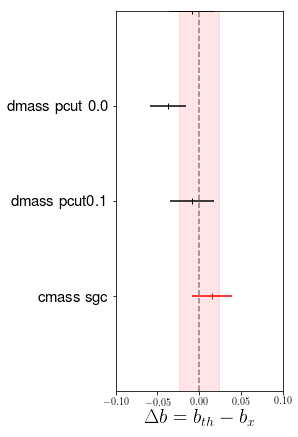

In [51]:
import scipy

theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)
theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
theory_ngc_interp = scipy.interpolate.interp1d(theta_th, theory)
#theory_sgc_interp = theory_sgc_interp(meanr)

fig, ax = plt.subplots(figsize = (3,7))
brelsqr = np.linspace(0.8, 1.2, 5000) 
b_n = 2.0
brelarr = np.sqrt(brelsqr)
dbarray = b_n*(1-brelarr)

labels_SP = ['dmass_no_weight_pcut00', 'dmass_no_weight_pcut01'] #, 'vetoed'] + ['+ '+o for o in order ]
#labels_SP = ['dmass_st82_no_weight'] #, 'vetoed'] + ['+ '+o for o in order ]
filenames = [ basedir+'acf_auto_'+str(j)+'_nbins10_jk50.txt' for j in labels_SP]
covnames = [ basedir+'acf_auto_'+str(j)+'_nbins10_jk50.cov' for j in labels_SP]

for j in range(0, len(labels_SP)+1):
    
    meanrw, xiw, xi_errw = np.loadtxt( filenames[j-1], unpack=True)
    cov_dmass_w = np.loadtxt( covnames[j-1], unpack=True)
    #meanrw, xiw, xi_errw = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.txt', unpack=True)
    #cov_dmass_w = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.cov', unpack=True)
    HFd = 1.0 #HF(100, 10)
    F_d = HFd * np.linalg.inv(cov_dmass_w)
    err_brelw, brelw, chisqr_resultw = brel_chisqr_fitting(xiw, theory_sgc_interp(meanrw), F_d, verbose=True)
    color = 'k'       
    ax.errorbar(2.-2*brelw, len(labels_SP)+1-j, xerr =err_brelw*2., fmt='-|', color=color)



j += 1
meanr_sgc, xi_sgc, xi_err_sgc = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt',unpack=True)
cov_cmass_s = np.genfromtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.cov')
HFs = 1.0 #HF(100, 10)
F_s = HFs * np.linalg.inv(cov_cmass_s)
err_brel_sgc, brel_sgc, chisqr_result_sgc = brel_chisqr_fitting(xi_sgc, theory_sgc_interp(meanr_sgc), F_s, verbose=True)

"""
meanr_ngc, xi_ngc, xi_err_ngc = np.loadtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.txt',unpack=True)
cov_cmass_n = np.genfromtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.cov')
HFn = 1.0 #HF(100, 10)
F_n = HFn * np.linalg.inv(cov_cmass_n)
err_brel_ngc, brel_ngc, chisqr_result_ngc = brel_chisqr_fitting(xi_ngc, theory_ngc_interp(meanr_ngc), F_n, verbose=True)
ax.errorbar(2.-2*brel_ngc, len(labels_SP)+1-j-1 , xerr =err_brel_ngc*2., fmt='-|', color='b')
"""



ax.errorbar(2.-2*brel_sgc, len(labels_SP)+1-j , xerr =err_brel_sgc*2., fmt='-|', color='r')
ax.axvspan( - err_brel_sgc*2., err_brel_sgc*2.,  alpha=0.1, color='red')
ax.axvline(x=0.0, color = 'grey', ls='--')
        
ax.set_xlabel(r'$\Delta b = b_{th} - b_x$', fontsize = 20)
#ax.set_ylabel(r'$\chi^2$')
ax.legend(loc=1)
#ax.set_xlim(-0.1+0.02, 0.1+0.02)
#ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_yticks(np.arange(0, len(labels_SP)+1 ))

labels = labels_SP[::-1]
labels = [ 'cmass sgc', 'dmass pcut0.1', 'dmass pcut 0.0']
ax.set_yticklabels( labels, fontsize = 15) 
ax.set_ylim(-1, 3)
ax.set_xlim(-0.1, 0.1)
fig.savefig(figoutdir + 'sys_bias.png')
print 'pic save to ', figoutdir + 'sys_bias.png'



# Systematics 

In [13]:
kind = 'SPT'
FullArea = SPTMaparea
#properties = ['DEPTH','EXPTIME']
#properties = ['DEPTH', 'EXPTIME', 'AIRMASS', 'SKYBRITE', 'FWHM', 'NSTARS']
properties = ['DEPTH', 'EXPTIME', 'AIRMASS', 'SKYBRITE', 'FWHM']
#properties = ['GE', 'NSTARS_allband']
#properties = ['FWHM']
suffix='no_weight'
# calculating galaxy density and weights iterately

In [14]:
sysMap = calling_sysMap( properties=properties, kind='SPT', nside=4096 )


PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
Y1A1NEW_COADD_SPT_band_g_nside4096_oversamp4_maglimit3__.fits.gz
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT

PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
Y1A1NEW_COADD_SPT_band_r_nside4096_oversamp4_maglimit3__.fits.gz
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT

PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
Y1A1NEW_COADD_SPT_band_i_nside4096_oversamp4_maglimit3__.fits.gz
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT

PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
Y1A1NEW_COADD_SPT_band_z_nside4096_oversamp4_maglimit3__.fits.gz
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT

PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
Y1A1NEW_COADD_SPT_band_g_nside4096_oversamp4_EXPTIME__total.fits.gz

In [15]:
sysMap_nstar = calling_sysMap( properties=['NSTARS_allband'], kind='SPT', nside=4096 )
sysMap_ge = calling_sysMap( properties=['GE'], kind='SPT', nside=4096 )


PATH =  /n/des/lee.5922/data/systematic_maps/Y1A1NEW_COADD_SPT/nside4096_oversamp4/
y1a1_gold_1.0.2_stars_nside1024.fits
NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
DOWNGRADE =  1024


In [16]:
sysMap_st82 = calling_sysMap( properties=['GE'], kind='STRIPE82', nside=4096 )

In [377]:
dmass_masked = maskingCatalogSP(catalog=dmass, sysMap=sysMap)
rand_masked = maskingCatalogSP(catalog=rand, sysMap=sysMap)
rand2_masked = maskingCatalogSP(catalog=rand2, sysMap=sysMap)

6777228 6641688
mask  0.9800006728414626
135511 132815
mask  0.9801049361306462
13570185 13297748
mask  0.9799238551279883


### DMASS st82 mocks galactic extinction test 

In [18]:
from systematics_module.contCorrection import doVisualization_ngal

../systematics.py:516: UserWarning: Warning: converting a masked element to nan.
  Ngal = np.array(Ngal)
/n/home00/lee.5922/.local/lib/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_GE_g_STRIPE82_gold_st82.txt
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/systematic_GE_STRIPE82_gold_st82.png


0

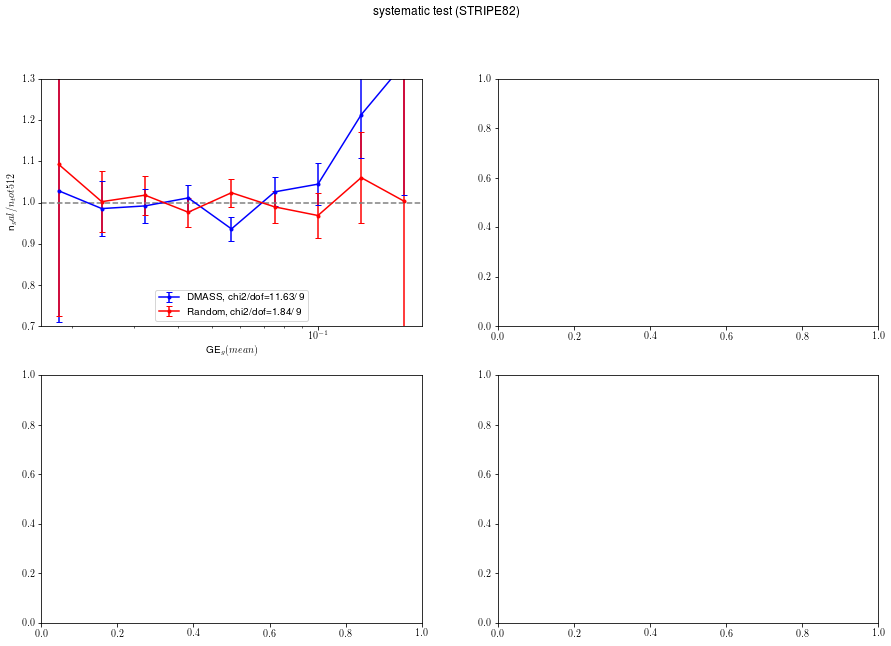

In [52]:

sys_ngal(cat1 = dmass_st82, cat2=rand_cmass, rand1 = rand2_cmass, rand2 = rand2_cmass, sysmap = sysMap_st82, 
     FullArea = SPTMaparea, properties = ['GE'], kind='STRIPE82', nbins =15, 
     nside = 4096,
     suffix='gold_st82', outdir=sysoutdir, reweight = dmass_st82['EachProb_CMASS'])

doVisualization_ngal(property = 'GE', nside = 4096, kind = 'STRIPE82', suffix='gold_st82', \
                     inputdir=sysoutdir, outdir=figoutdir)

saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_GE_g_SPT_gold_spt.txt
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/systematic_GE_SPT_gold_spt.png


0

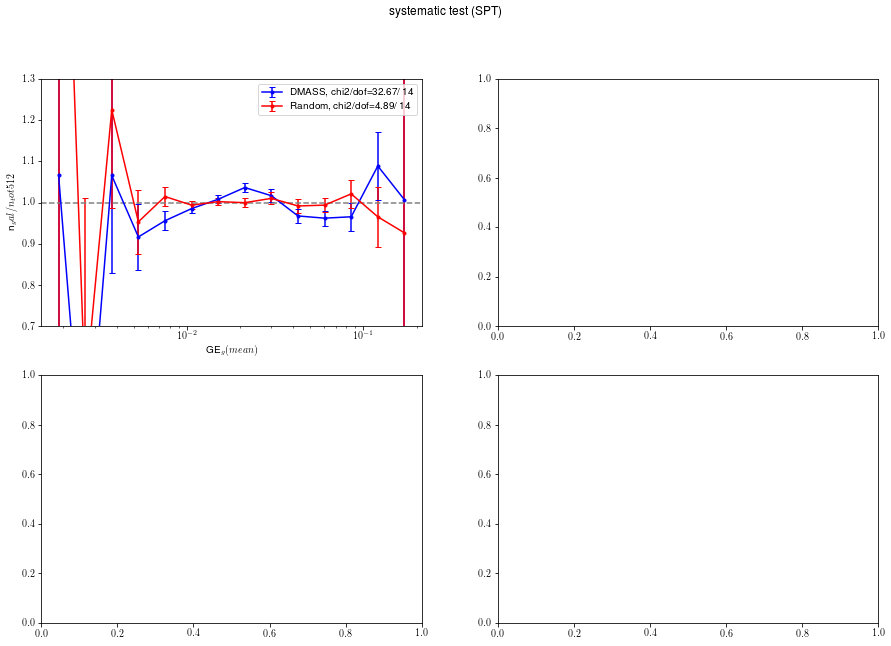

In [53]:
sys_ngal(cat1 = dmass, cat2=rand, rand1 = rand2, rand2 = rand2, sysmap = sysMap_ge, 
         FullArea = SPTMaparea, properties = ['GE'], kind='SPT', nbins =15, 
         reweight= dmass['EachProb_CMASS'], nside = 4096,
         suffix='gold_spt', outdir=sysoutdir)

from systematics_module.contCorrection import doVisualization_ngal
doVisualization_ngal(property = 'GE', nside = 4096, kind = 'SPT', suffix='gold_spt', \
                         inputdir=sysoutdir, outdir=figoutdir)

In [55]:
sys_ngal(cat1 = dmass, cat2=rand, rand1 = rand2, rand2 = rand2, sysmap = sysMap, 
         FullArea = SPTMaparea, properties = properties, kind='SPT', nbins =15, 
         reweight= dmass['EachProb_CMASS'], nside = 4096,
         suffix='no_weight', outdir=sysoutdir)

saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_DEPTH_g_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_DEPTH_r_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_DEPTH_i_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_DEPTH_z_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_EXPTIME_g_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_EXPTIME_r_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_EXPTIME_i_SPT_no_weight.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_EXPTIME_z_SPT_no_weight.txt
saving data to  ../output/sfd_train_phot

saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/systematic_DEPTH_SPT_no_weight.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/systematic_EXPTIME_SPT_no_weight.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/systematic_AIRMASS_SPT_no_weight.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/systematic_SKYBRITE_SPT_no_weight.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/systematic_FWHM_SPT_no_weight.png


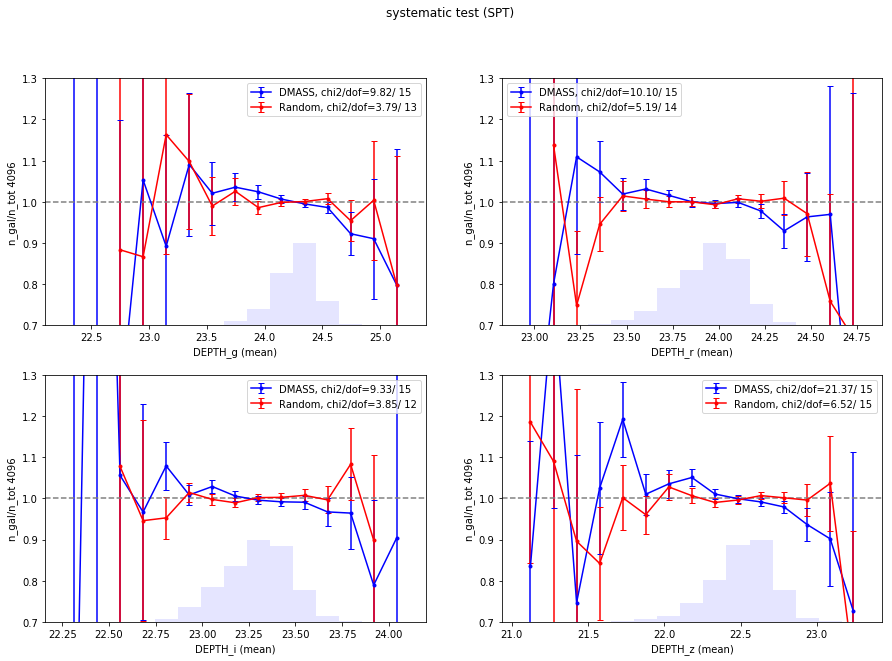

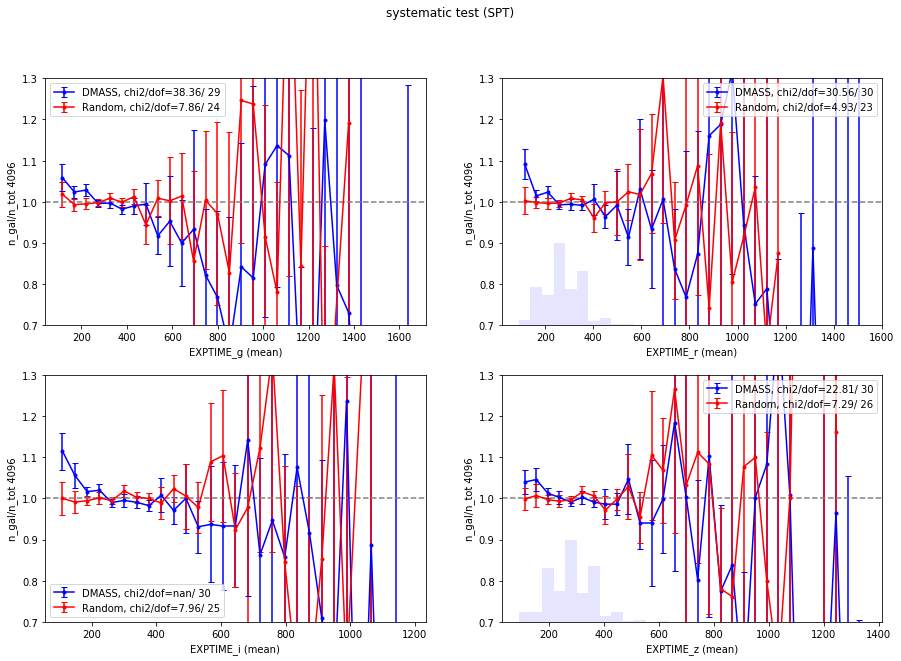

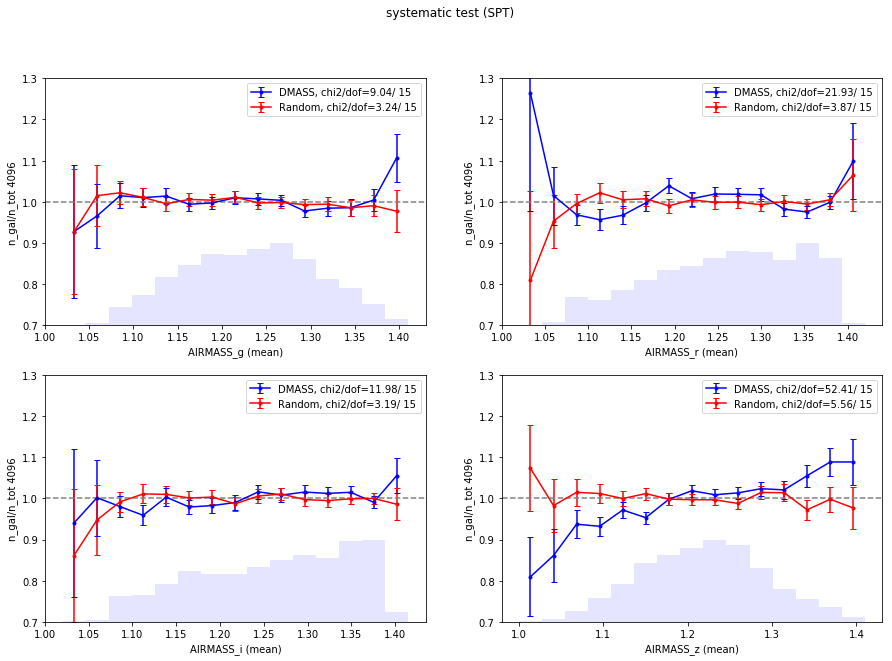

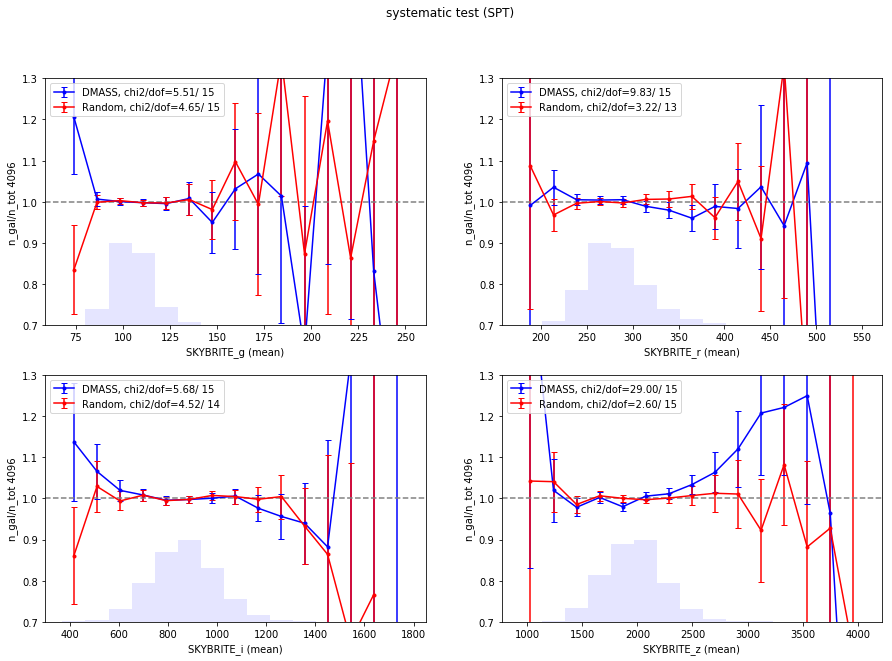

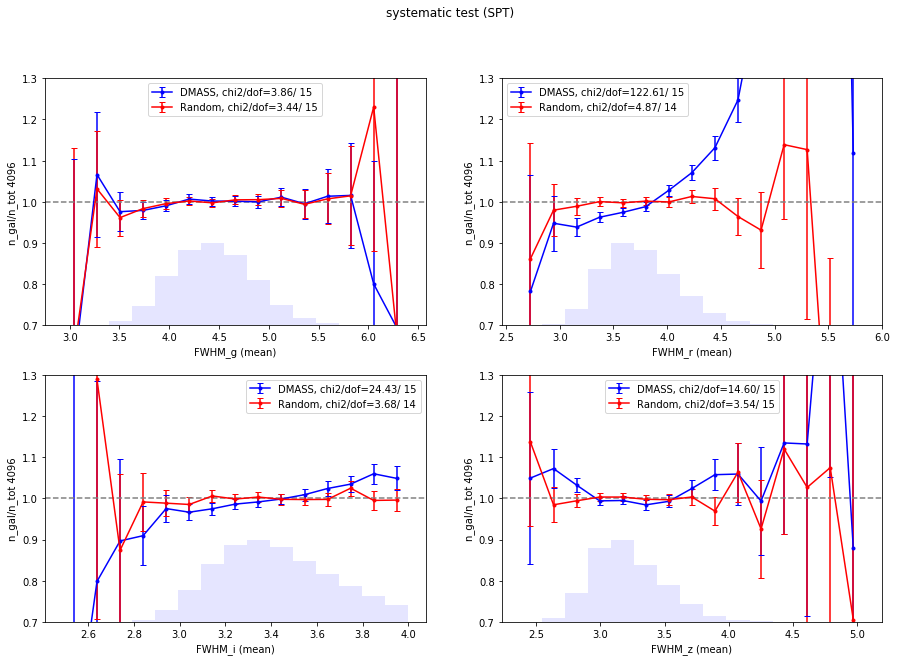

In [11]:
from systematics_module.contCorrection import doVisualization_ngal
for p in properties : 
    doVisualization_ngal(property = p, nside = 4096, kind = kind, suffix='no_weight', \
                         inputdir=sysoutdir, outdir=figoutdir )

In [33]:
sys_ngal(cat1 = dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2 = rand2_masked, sysmap = sysMap, 
         FullArea = SPTMaparea, properties = ['EXPTIME'], kind='SPT', nbins =15, 
         reweight= dmass_masked['EachProb_CMASS'], nside = 4096,
         suffix='vetoed', outdir=sysoutdir)

saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_EXPTIME_g_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_EXPTIME_r_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_EXPTIME_i_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_EXPTIME_z_SPT_vetoed.txt


In [21]:
sys_ngal(cat1 = dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2 = rand2_masked, sysmap = sysMap, 
         FullArea = SPTMaparea, properties = properties, kind='SPT', nbins =15, 
         reweight= dmass_masked['EachProb_CMASS'], nside = 4096,
         suffix='vetoed', outdir=sysoutdir)

../systematics.py:535: RuntimeWarning: divide by zero encountered in divide
  err = 1./np.sqrt(Ngal * w_FKP) * norm_galaxy_density
../systematics.py:535: RuntimeWarning: invalid value encountered in multiply
  err = 1./np.sqrt(Ngal * w_FKP) * norm_galaxy_density


saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_DEPTH_g_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_DEPTH_r_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_DEPTH_i_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_DEPTH_z_SPT_vetoed.txt


../systematics.py:516: UserWarning: Warning: converting a masked element to nan.
  Ngal = np.array(Ngal)
/n/home00/lee.5922/.local/lib/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
../systematics.py:531: RuntimeWarning: invalid value encountered in divide
  Ngal_avg = Ngal *1./Nrand


saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_EXPTIME_g_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_EXPTIME_r_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_EXPTIME_i_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_EXPTIME_z_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_AIRMASS_g_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_AIRMASS_r_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_AIRMASS_i_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_AIRMASS_z_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband

saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/systematic_DEPTH_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/systematic_EXPTIME_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/systematic_AIRMASS_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/systematic_SKYBRITE_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/systematic_FWHM_SPT_vetoed.png


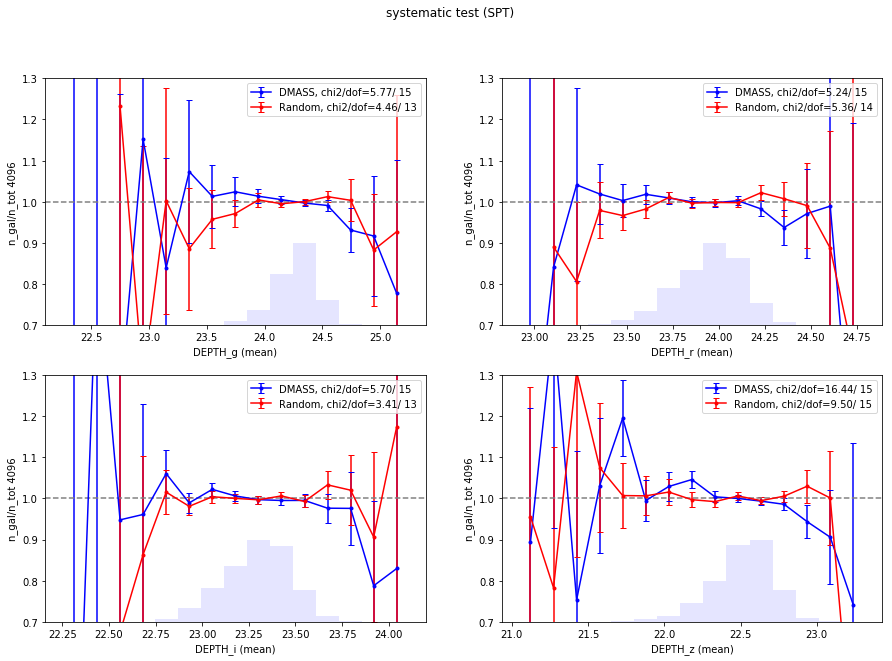

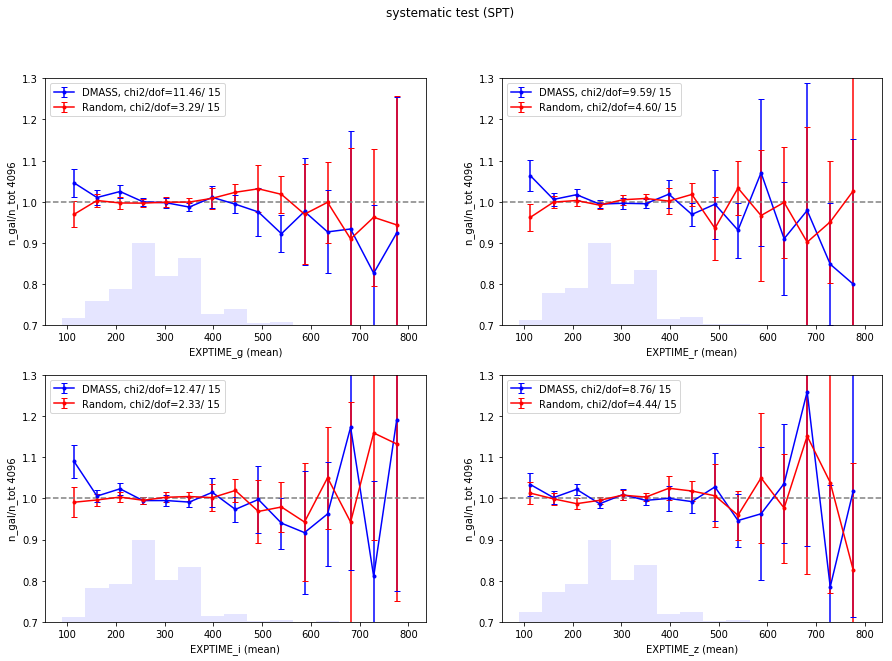

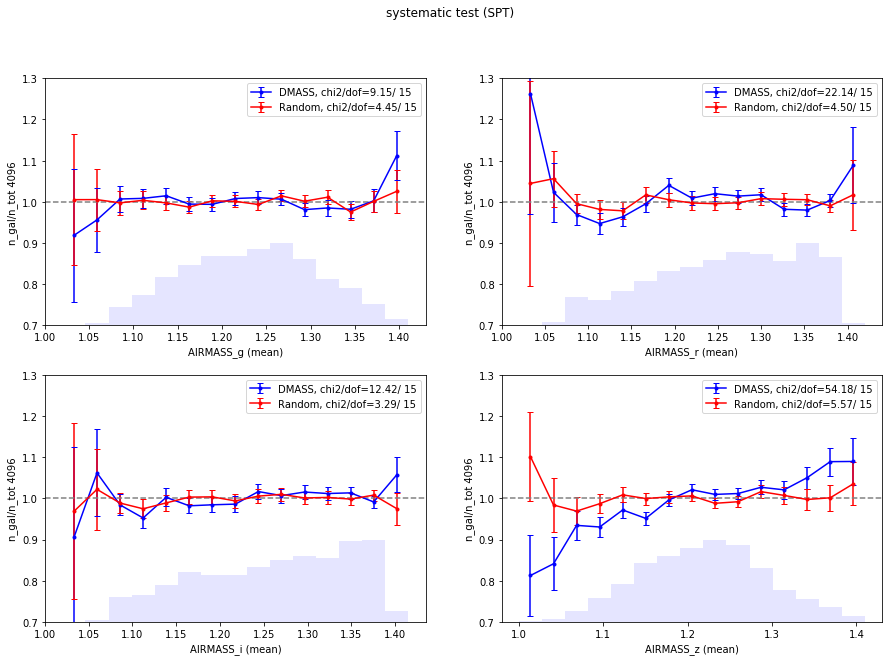

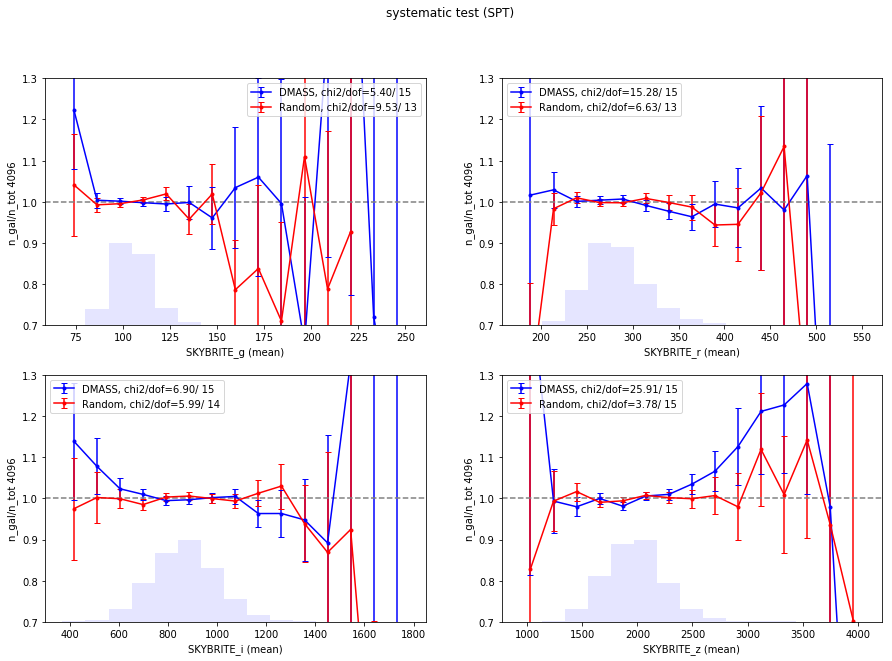

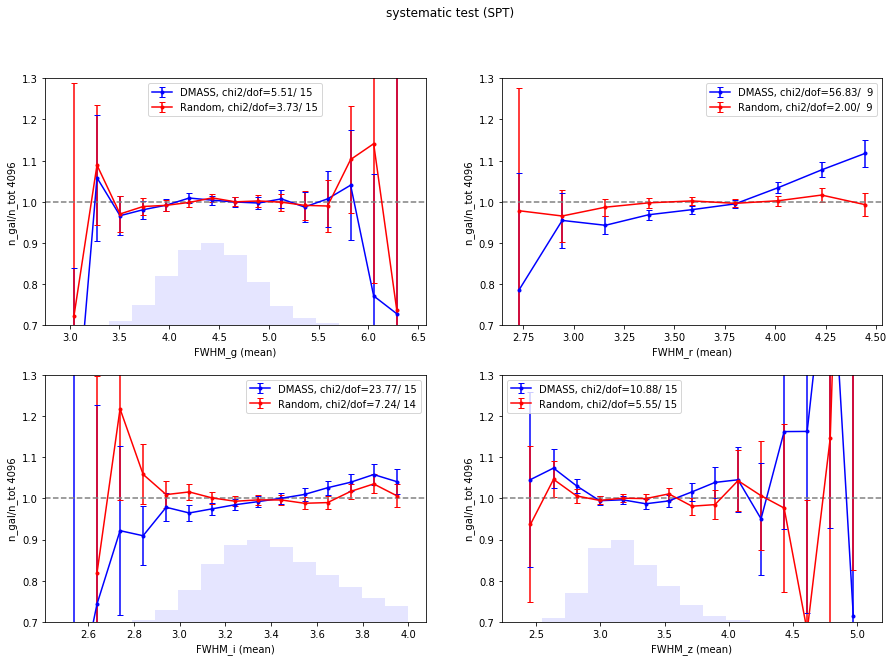

In [34]:
from systematics_module.contCorrection import doVisualization_ngal
for p in properties : 
    doVisualization_ngal(property = p, nside = 4096, kind = kind, suffix='vetoed', \
                         inputdir=sysoutdir, outdir=figoutdir )

In [23]:
#sys_ngal(cat1 = dmass, cat2=rand, rand1 = rand2, rand2 = rand2, sysmap = sysMap_ge, 
#         FullArea = SPTMaparea, properties = ['GE'], kind='SPT', nbins =15, 
#         reweight= dmass['EachProb_CMASS'], nside = 4096,
#         suffix='no_weight', outdir=sysoutdir)
#sys_ngal(cat1 = dmass, cat2=rand, rand1 = rand2, rand2 = rand2, sysmap = sysMap_nstar, 
#         FullArea = SPTMaparea, properties = ['NSTARS_allband'], kind='SPT', nbins =15, 
#         reweight= dmass['EachProb_CMASS'], nside = 4096,
#         suffix='no_weight', outdir=sysoutdir)
sys_ngal(cat1 = dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2 = rand2_masked, sysmap = sysMap_ge, 
         FullArea = SPTMaparea, properties = ['GE'], kind='SPT', nbins =15, 
         reweight= dmass_masked['EachProb_CMASS'], nside = 4096,
         suffix='vetoed', outdir=sysoutdir)
sys_ngal(cat1 = dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2 = rand2_masked, sysmap = sysMap_nstar, 
         FullArea = SPTMaparea, properties = ['NSTARS_allband'], kind='SPT', nbins =15, 
         reweight= dmass_masked['EachProb_CMASS'], nside = 4096,
         suffix='vetoed', outdir=sysoutdir)

saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_GE_g_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_NSTARS_allband_g_SPT_vetoed.txt


saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/systematic_GE_SPT_vetoed.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/systematic_NSTARS_allband_SPT_vetoed.png


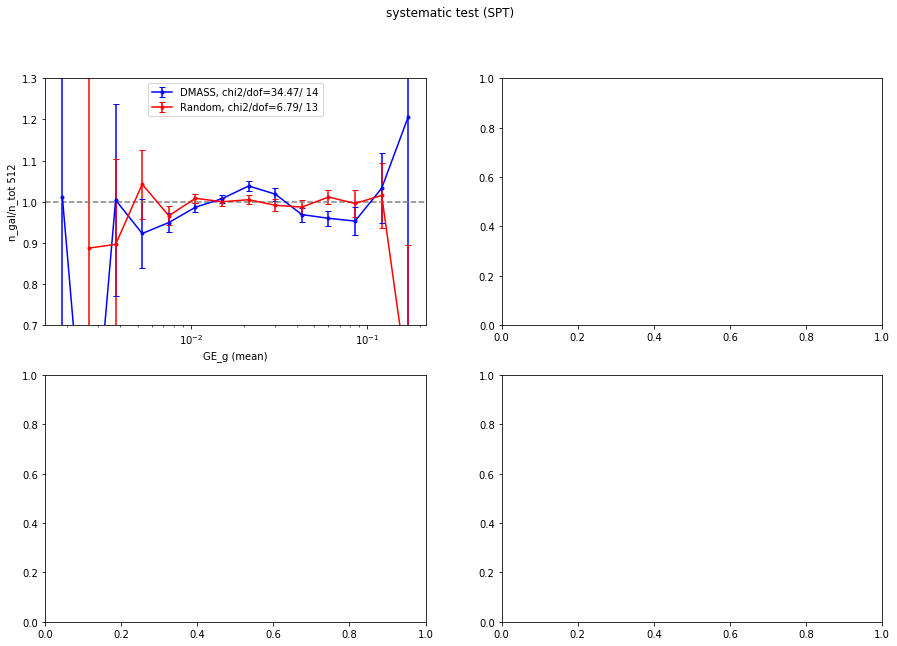

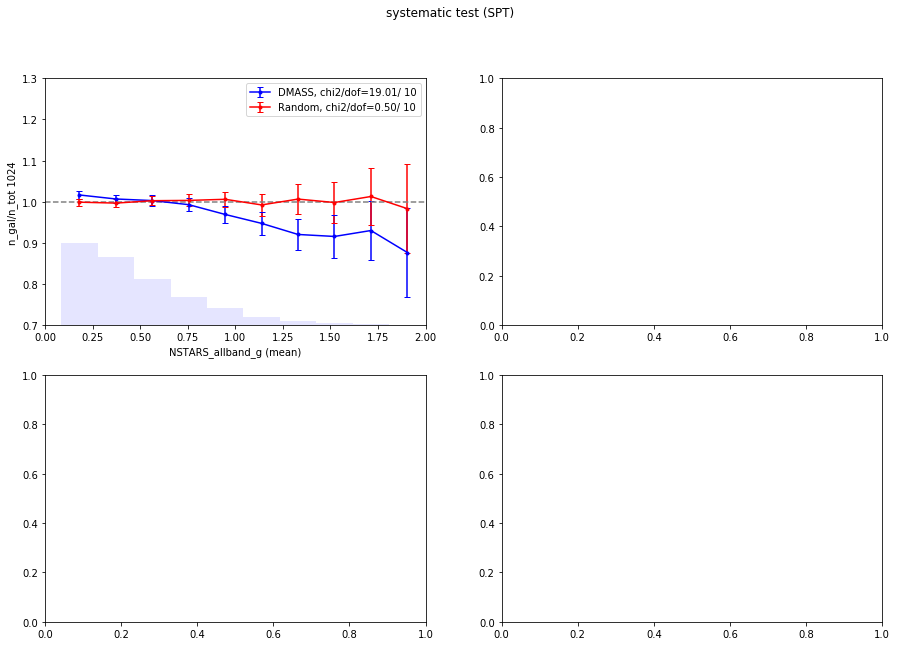

In [48]:

for p in ['GE', 'NSTARS_allband'] : 
    doVisualization_ngal(property = p, nside = 4096, kind = kind, suffix='vetoed', \
                         inputdir=sysoutdir, outdir=figoutdir )

all linear function
chi2_null =  5.765343114593144
chi2_mod. =  2.927515448862259
Delta chi2 (sample) = 2.8378276657308854
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_DEPTH_g_SPT_vetoed.txt.model

chi2_null =  5.24182654361615
chi2_mod. =  3.151776716424299
Delta chi2 (sample) = 2.090049827191851
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_DEPTH_r_SPT_vetoed.txt.model

chi2_null =  5.69588788472814
chi2_mod. =  3.541244913550697
Delta chi2 (sample) = 2.1546429711774424
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_DEPTH_i_SPT_vetoed.txt.model

chi2_null =  16.43999615288693
chi2_mod. =  7.889897243936404
Delta chi2 (sample) = 8.550098908950527
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_DEPTH_z_SPT_vetoed.txt.model

saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys

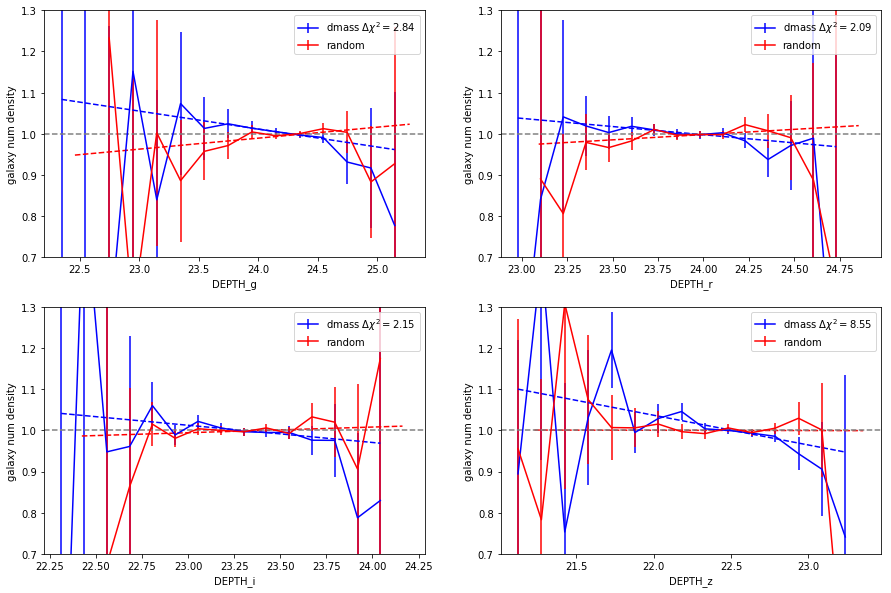

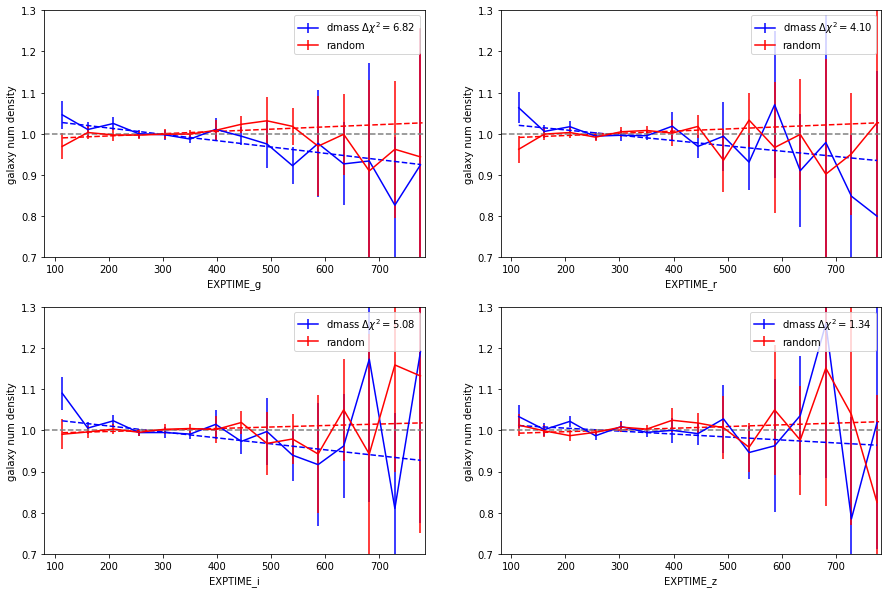

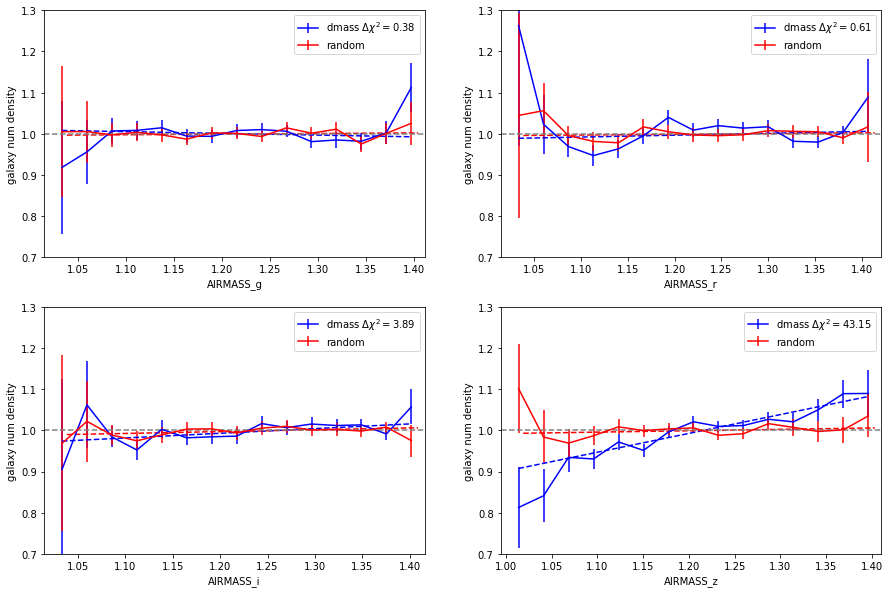

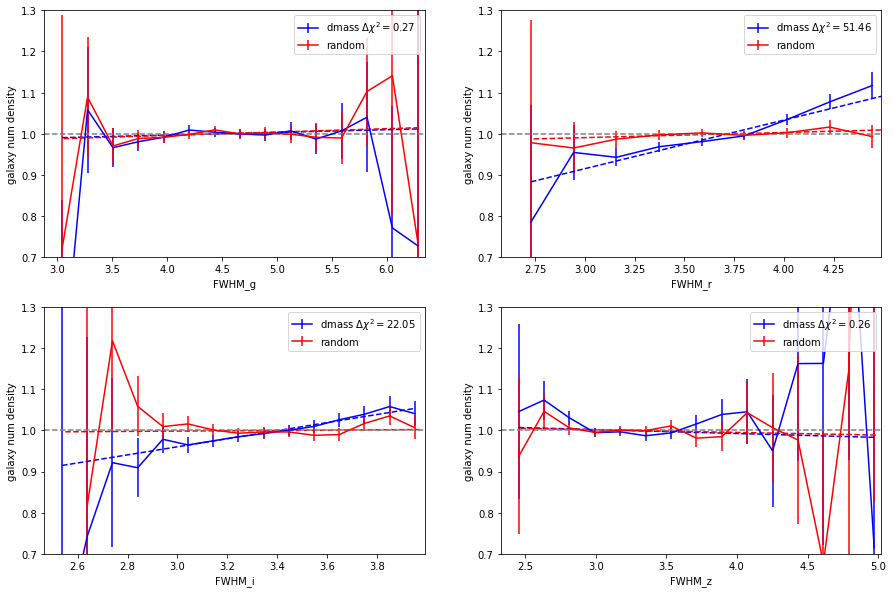

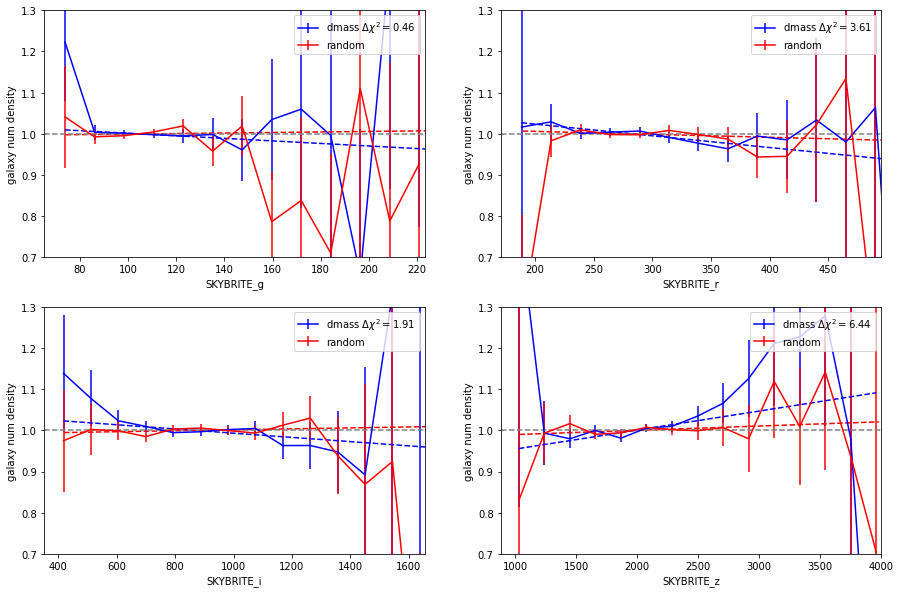

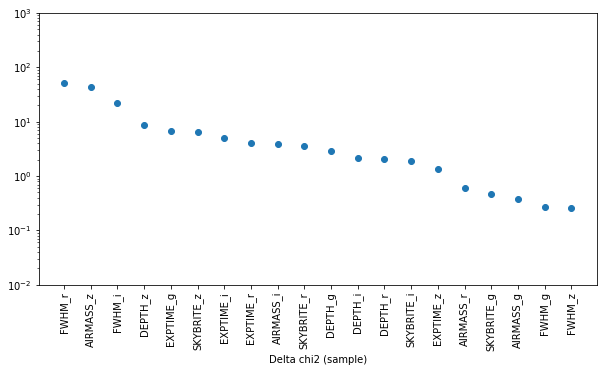

In [110]:
fitting_allSP( 'vetoed', properties = properties, inputdir = sysoutdir )
nextwname, nextw = plotting_significance( property = properties, filter=['g', 'r', 'i', 'z'], kind = 'SPT', 
                      suffix='vetoed', 
                path = sysoutdir, deltachi2=True)

# Correction ! 

### Galactic Extinction

In [244]:
weightDic = {}
weightDic['vetoed'] = dmass['EachProb_CMASS']
all_weight = weightmultiply(weightDic)
suffix = 'vetoed'
nextweight = nextwname[0]
print 'nextweight', nextweight

['vetoed']
vetoed
nextweight AIRMASS_z


-------------------------
 iteration - 0
 nextweight AIRMASS_z
-------------------------
['vetoed']
vetoed
----------------------------------
initialize function  AIRMASS_z
linear


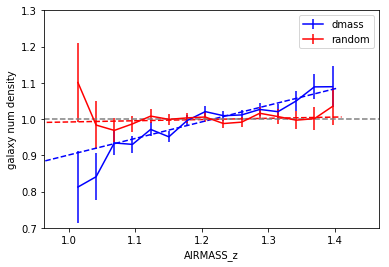

KeyboardInterrupt: 

In [245]:
applied_weight = []
for ii in range(21):
    
    #nextweight = 'AIRMASS_g'
    print '-------------------------'
    print ' iteration -', ii
    print ' nextweight', nextweight
    print '-------------------------'
    #if ii < 7 : pp = []
    #else : pp = properties
    all_weight = weightmultiply(weightDic)
    function = 'linear'
    #if nextweight == 'SKYBRITE_i': function = 'errftn'
    
    sys_iteration( nextweight=nextweight, suffix=suffix, all_weight = all_weight, 
                      cat1=dmass, cat2=rand, rand1 = rand2, rand2=rand2,
                      sysMap = sysMap, nside=4096, kind='SPT', function=function, function2 = None,
                      properties = [], filters=['g', 'r', 'i', 'z'],
                      path=sysoutdir, plot=True, weightDic=weightDic, FullArea=SPTMaparea )
    
    if suffix == 'vetoed': suffix = 'wg_'+nextweight.lower()
    else : suffix = suffix+'_'+nextweight.lower()
        
    fitting_allSP( suffix, properties = properties, inputdir = sysoutdir, plot=False )
    nextwname, nextw = plotting_significance( property = properties, filter=['g', 'r', 'i','z'], kind = kind, 
                          suffix=suffix, 
                    path = sysoutdir, deltachi2=True)
    
    nextweight = nextwname[0]
    for i in range(1,len(nextwname)):
        if nextweight in applied_weight :
            nextweight = nextwname[i]
        else : break
    applied_weight.append(nextweight)



# Appling weights 

In [113]:
suffix

'wg_fwhm_r_airmass_z_exptime_g_fwhm_i_airmass_g_fwhm_g'

In [396]:
suf = 'wg_fwhm_r_airmass_z_exptime_g_fwhm_i_airmass_g_fwhm_g'
#suf = 'wg_fwhm_r_airmass_z_exptime_g_fwhm_i_airmass_g_fwhm_g_airmass_i_skybrite_i'
#suf = 'wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z_skybrite_z_airmass_r_skybrite_g'
#suf = 'wg_fwhm_r_airmass_z_fwhm_i_skybrite_i_fwhm_g_airmass_g_fwhm_z_exptime_g_airmass_i_exptime_z'

orderlabel = suf.split('_')[1:]
order = []
for i in np.arange(0, len(orderlabel), 2):
    order.append( orderlabel[i]+'_'+orderlabel[i+1] )
print order

weightDic_re = {}
weightDic_re['vetoed'] = dmass['EachProb_CMASS']
maskhp = maskingCatalogSP(catalog=dmass, maskonly=True, sysMap=sysMap)
weightDic_re['vetoed'][~maskhp] = 0 
for o in order : 
    w = fitsio.read(sysoutdir+'weights/wg_'+o+'_SPT.fits')
    weightDic_re[o] = w #[maskhp]
    
all_weight = weightmultiply(weightDic_re)

['fwhm_r', 'airmass_z', 'exptime_g', 'fwhm_i', 'airmass_g', 'fwhm_g']
665582 665582
mask  1.0


IndexError: boolean index did not match indexed array along dimension 0; dimension is 6777228 but corresponding boolean dimension is 665582

In [247]:
np.sum(weightDic_re['vetoed'] == 0 ), 

(135540,)

In [47]:
sys_ngal(cat1 = dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2 = rand2_masked, sysmap = sysMap_ge, 
         FullArea = SPTMaparea, properties = ['GE'], kind='SPT', nbins =15, 
         reweight= dmass_masked['EachProb_CMASS'], nside = 4096,
         suffix='vetoed', outdir=sysoutdir)
sys_ngal(cat1 = dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2 = rand2_masked, sysmap = sysMap_nstar, 
         FullArea = SPTMaparea, properties = ['NSTARS_allband'], kind='SPT', nbins =10, 
         reweight= dmass_masked['EachProb_CMASS'], nside = 4096,
         suffix='vetoed', outdir=sysoutdir)

../systematics.py:516: UserWarning: Warning: converting a masked element to nan.
  Ngal = np.array(Ngal)


saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_GE_g_SPT_vetoed.txt
saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_NSTARS_allband_g_SPT_vetoed.txt


In [42]:
#sys_ngal(cat1 = dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2 = rand2_masked, sysmap = sysMap_ge, 
#         FullArea = SPTMaparea, properties = ['GE'], kind='SPT', nbins =15, 
#         reweight= all_weight, nside = 4096,
#         suffix=suf, outdir=sysoutdir)
sys_ngal(cat1 = dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2 = rand2_masked, sysmap = sysMap_nstar, 
         FullArea = SPTMaparea, properties = ['NSTARS_allband'], kind='SPT', nbins =10, 
         reweight= all_weight, nside = 4096,
         suffix=suf, outdir=sysoutdir)

saving data to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_NSTARS_allband_g_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_airmass_g_fwhm_g_airmass_i_skybrite_i.txt


In [52]:
fitting_allSP( suf, properties = properties+['GE', 'NSTARS_allband'], inputdir = sysoutdir, plot=False )
fitting_allSP( 'vetoed', properties = properties+['GE', 'NSTARS_allband'], inputdir = sysoutdir, plot=False )

all linear function
chi2_null =  2.0347132975810056
chi2_mod. =  1.786457904995245
Delta chi2 (sample) = 0.24825539258576068
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_DEPTH_g_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_airmass_g_fwhm_g.txt.model

chi2_null =  2.786182492462108
chi2_mod. =  2.512166381220087
Delta chi2 (sample) = 0.27401611124202097
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_DEPTH_r_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_airmass_g_fwhm_g.txt.model

chi2_null =  3.2602628029992977
chi2_mod. =  2.9332531060669007
Delta chi2 (sample) = 0.327009696932397
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_DEPTH_i_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_airmass_g_fwhm_g.txt.model

chi2_null =  6.820428983466175
chi2_mod. =  6.798276420835595
Delta chi2 (sample) = 0.02215256263057963
output save to  ../output/sfd_train_photo_SamPle_nozb

chi2_null =  5.398155244215073
chi2_mod. =  4.9358230458061545
Delta chi2 (sample) = 0.4623321984089186
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_SKYBRITE_g_SPT_vetoed.txt.model

chi2_null =  15.282628497533912
chi2_mod. =  11.67597830773377
Delta chi2 (sample) = 3.606650189800142
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_SKYBRITE_r_SPT_vetoed.txt.model

chi2_null =  6.901378063205396
chi2_mod. =  4.98946052470665
Delta chi2 (sample) = 1.911917538498746
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_SKYBRITE_i_SPT_vetoed.txt.model

chi2_null =  25.91465482818271
chi2_mod. =  19.472578101149857
Delta chi2 (sample) = 6.442076727032852
output save to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//sys/systematic_SKYBRITE_z_SPT_vetoed.txt.model

chi2_null =  19.012253923093958
chi2_mod. =  1.7421972113721005
Delta chi2 (sample) =

----------------------------------
initialize function  DEPTH_g
linear


KeyError: 'sys_DEPTH_g_SPT'

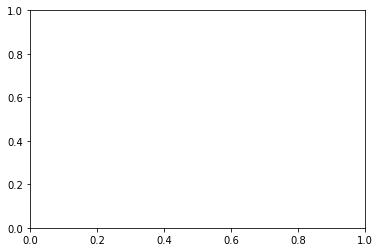

In [74]:

"""
sys_iteration( nextweight=nextweight, suffix=suffix, all_weight = all_weight, 
                  cat1=dmass_masked, cat2=rand_masked, rand1 = rand2_masked, rand2=rand2_masked,
                  sysMap = sysMap_nstar, nside=4096, kind='SPT', function=function, function2 = None,
                  properties = properties, filters=['g', 'r', 'i', 'z'],
                  path=sysoutdir, plot=True, weightDic=weightDic, FullArea=SPTMaparea )

if suffix == 'vetoed': suffix = 'wg_'+nextweight.lower()
else : suffix = suffix+'_'+nextweight.lower()

fitting_allSP( suffix, properties = properties[:-2], inputdir = sysoutdir, plot=False )
nextwname, nextw = plotting_significance( property = properties, filter=['g', 'r', 'i','z'], kind = kind, 
                      suffix=suffix, 
                path = sysoutdir, deltachi2=True)
                
"""

In [55]:
filters = ['g', 'r', 'i', 'z']

[51.45863327126981, 43.150231799356334, 22.047924363785317, 8.550098908950527, 6.824647377250918, 6.442076727032852, 5.078716110954057, 4.099145073489916, 3.8863786176053843, 3.606650189800142, 2.8378276657308854, 2.1546429711774424, 2.090049827191851, 1.911917538498746, 1.335782391704667, 0.6066018624859453, 0.4623321984089186, 0.382102932211815, 0.2729032140417953, 0.2573085425051769, 0.19756733913263247]


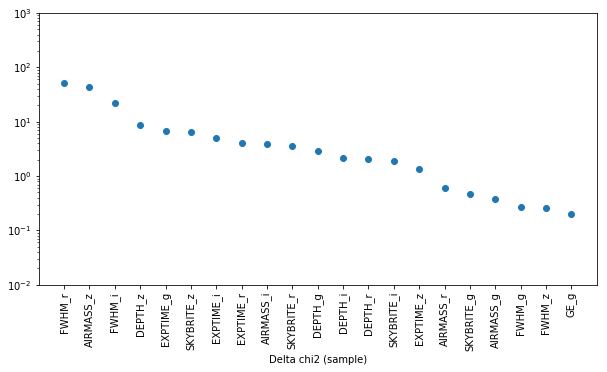

[0.9748392024647377, 0.8462910054904107, 0.43456878316015946, 0.41596682365165094, 0.37441080445105257, 0.327009696932397, 0.27401611124202097, 0.24825539258576068, 0.1885338033097863, 0.1207929659631155, 0.1187544569786727, 0.10236953326419673, 0.08570667283681166, 0.0728495021379949, 0.05845076074814326, 0.04715346579051172, 0.045082620362810744, 0.02215256263057963, 0.00256234734474603, 0.0022165155986568763, 0.0018001133292528948]


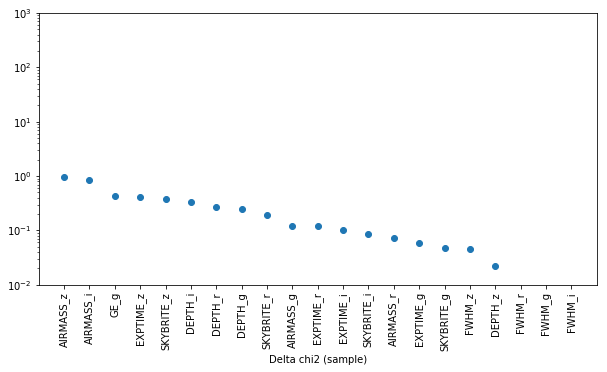

In [118]:
label_no_weight, values_no_weight = plotting_significance( property = properties+['GE'], filter=filters, kind = kind, suffix='vetoed', 
                    path = sysoutdir, deltachi2=True)
label_full_weight, values_full_weight = plotting_significance( property = properties+['GE'], filter=filters, kind = kind, suffix=suf, 
                    path = sysoutdir, deltachi2=True)
#label_full_weight2, values_full_weight2 = plotting_significance( property = properties, filter=filters, kind = kind, suffix=suf2, 
#                    path = inputdir, deltachi2=True)

0

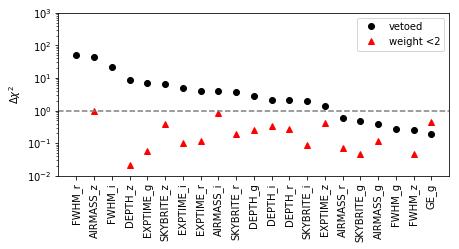

In [119]:

values_full_weight_reorder = []
for la in label_no_weight:
    for j in range(len(label_full_weight)):
        if la == label_full_weight[j]: 
            values_full_weight_reorder.append(values_full_weight[j])
            break
"""
values_full_weight_reorder2 = []
for la in label_no_weight:
    for j in range(len(label_full_weight2)):
        if la == label_full_weight2[j]: 
            values_full_weight_reorder2.append(values_full_weight2[j])
            break
"""           
values_full_weight_reorder = np.array(values_full_weight_reorder)
#values_full_weight_reorder2 = np.array(values_full_weight_reorder2)

fig, ax = plt.subplots(figsize = (7,3))

ax.plot( np.arange( len(values_no_weight) ), values_no_weight,  'ko' , label='vetoed'  )
ax.plot( np.arange( len(values_no_weight) ), values_full_weight_reorder, 'r^', label='weight <2'  )
#ax.plot( np.arange( len(values_no_weight) ), values_full_weight_reorder2, 'b^', label='weight <1'  )


#ax.plot( values_no_weight, np.arange( len(values_no_weight) ),  'ko'  )
#ax.plot( values_full_weight_reorder, np.arange( len(values_no_weight) ),  'ro'  )
#ax.axhline(y = 1, ls = '--', color='grey')
ax.axhline(y = 1, ls = '--', color='grey')
#ax.axhline(y = 1, ls = '--', color='grey')
ax.set_ylim(0.01,1000)
ax.set_ylabel(r'$\Delta \chi^2$')
ax.set_xticks( np.arange(len(values_no_weight)))
ax.set_xticklabels(label_no_weight, rotation = 90)
ax.set_yscale('log')
ax.legend(loc='best')

fig.savefig(inputdir+'comparison3_chisquare_'+suf+'.png')
0

In [263]:
paperpic =  '../paper_figure/'

NSTARS_allband  g
saving fig to  ../paper_figure/comparison_systematic_NSTARS_allband_g.pdf
GE  g
saving fig to  ../paper_figure/comparison_systematic_GE_g.pdf
FWHM  r
saving fig to  ../paper_figure/comparison_systematic_FWHM_r.pdf
AIRMASS  z
saving fig to  ../paper_figure/comparison_systematic_AIRMASS_z.pdf
EXPTIME  g
saving fig to  ../paper_figure/comparison_systematic_EXPTIME_g.pdf
FWHM  i
saving fig to  ../paper_figure/comparison_systematic_FWHM_i.pdf
AIRMASS  g
saving fig to  ../paper_figure/comparison_systematic_AIRMASS_g.pdf
FWHM  g
saving fig to  ../paper_figure/comparison_systematic_FWHM_g.pdf


0

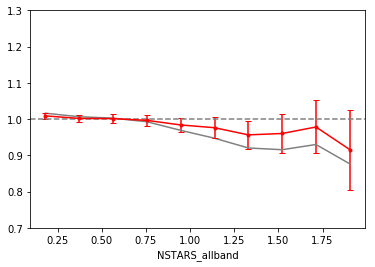

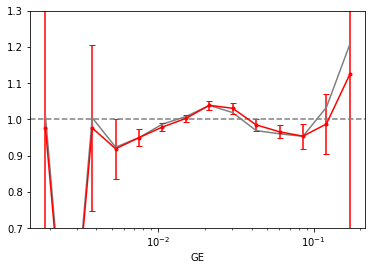

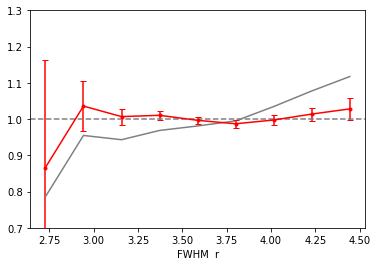

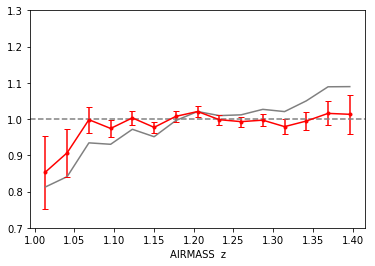

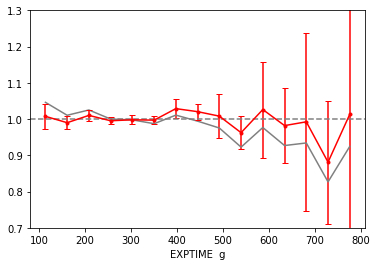

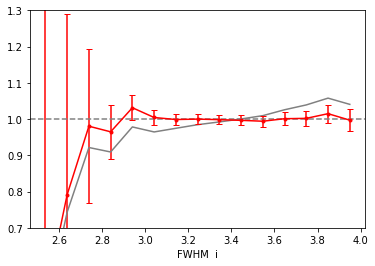

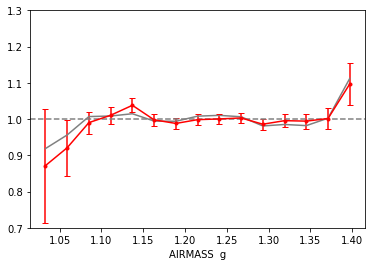

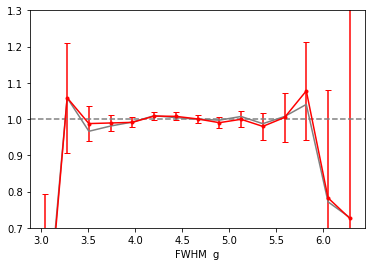

In [265]:
from run_systematics import plot_sysweight_one
plot_sysweight_one(property = 'NSTARS_allband', nside = 1024, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'GE', nside = 1024, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'FWHM', filter='r', nside = 1024, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'AIRMASS', filter='z', nside = 1024, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'EXPTIME', filter='g', nside = 1024, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'FWHM', filter='i', nside = 1024, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'AIRMASS', filter='g', nside = 1024, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

plot_sysweight_one(property = 'FWHM', filter='g', nside = 1024, kind = 'SPT', 
           suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=paperpic)

saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/comparison_systematic_DEPTH_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_airmass_g_fwhm_g.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/comparison_systematic_EXPTIME_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_airmass_g_fwhm_g.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/comparison_systematic_AIRMASS_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_airmass_g_fwhm_g.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/comparison_systematic_SKYBRITE_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_airmass_g_fwhm_g.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/comparison_systematic_FWHM_SPT_wg_fwhm_r_airmass_z_exptime_g_fwhm_i_airmass_g_fwhm_g.png
saving fig to  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//figure/comparison_systematic_GE_SPT_wg_fwhm_r_a

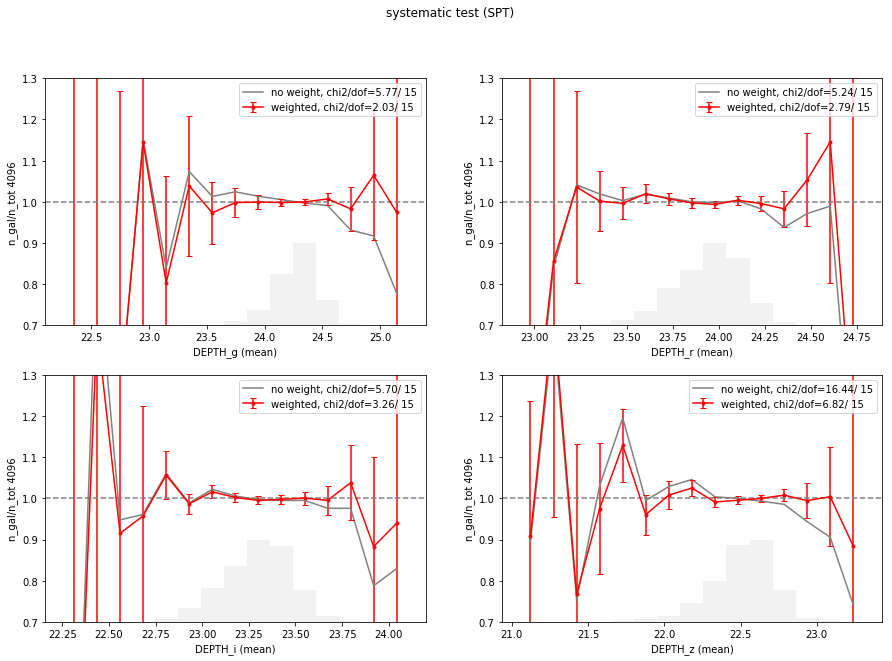

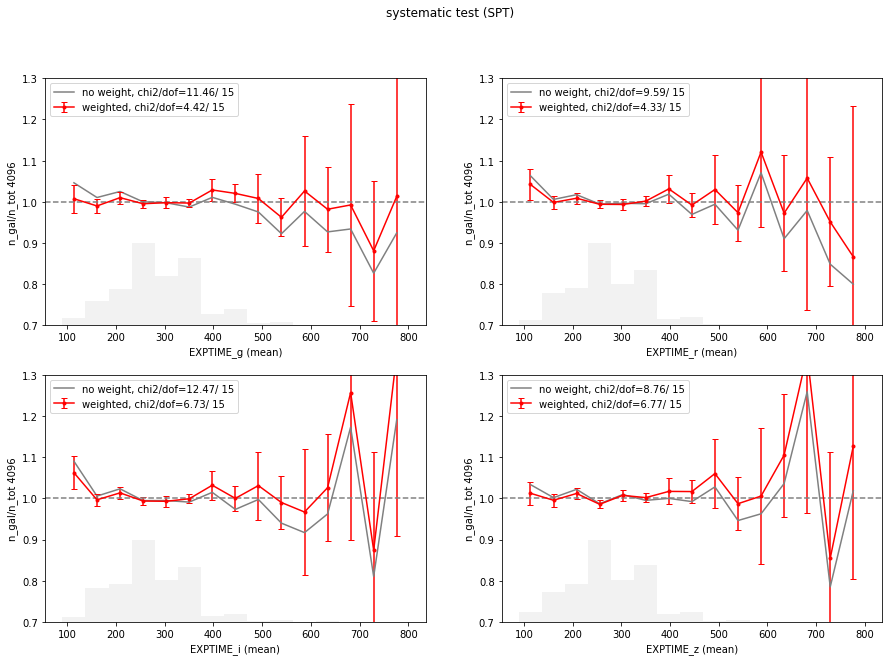

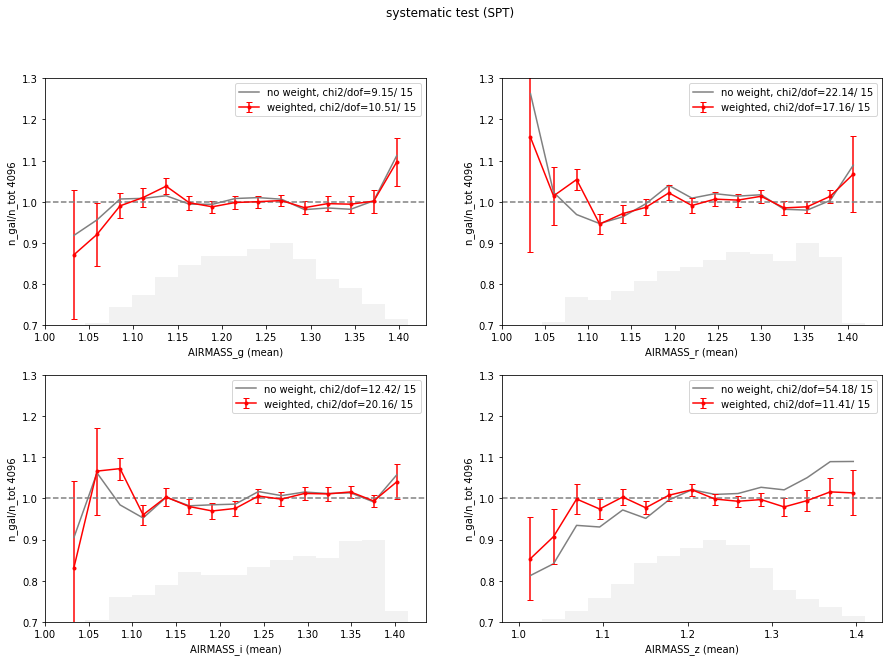

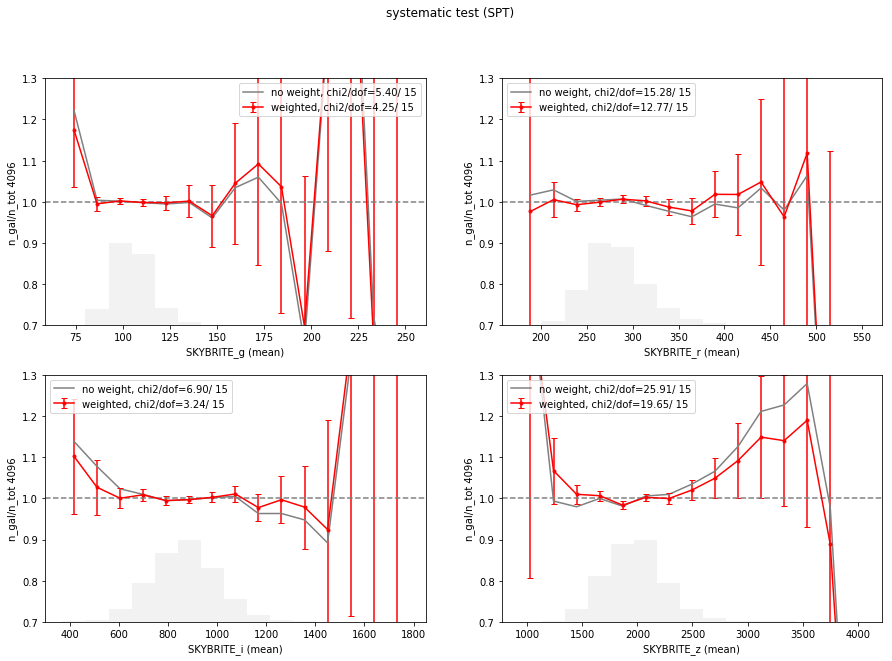

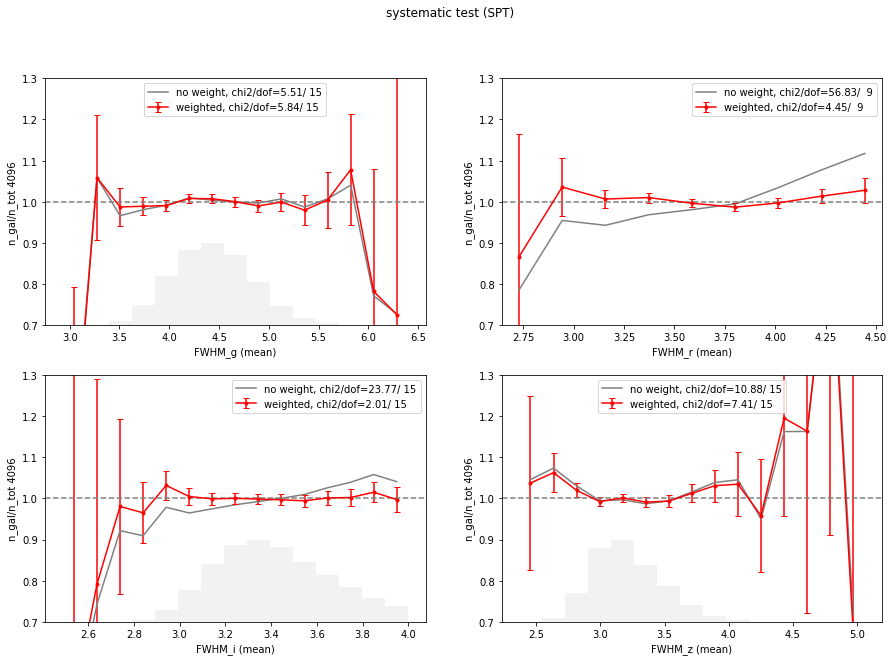

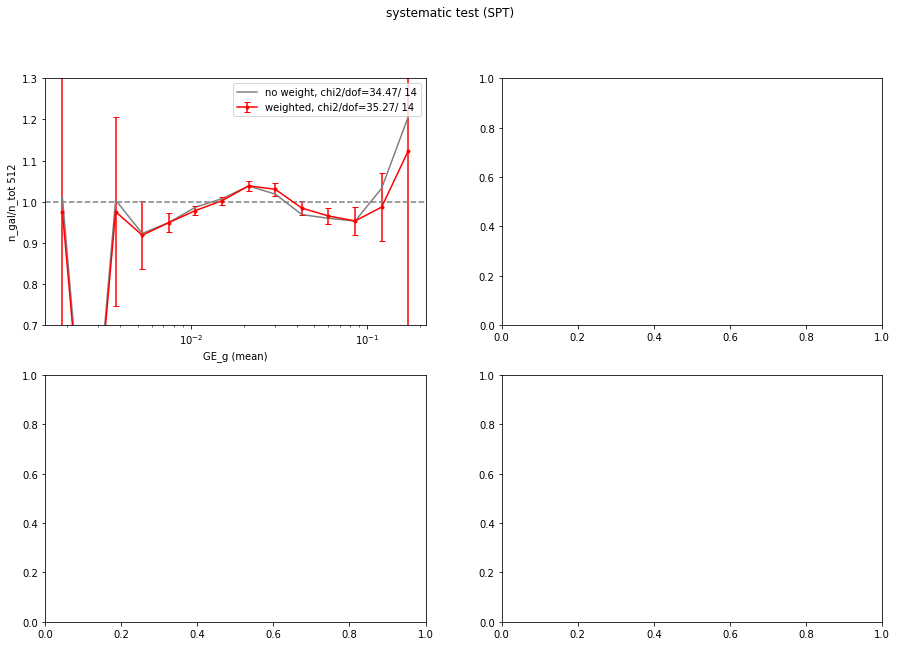

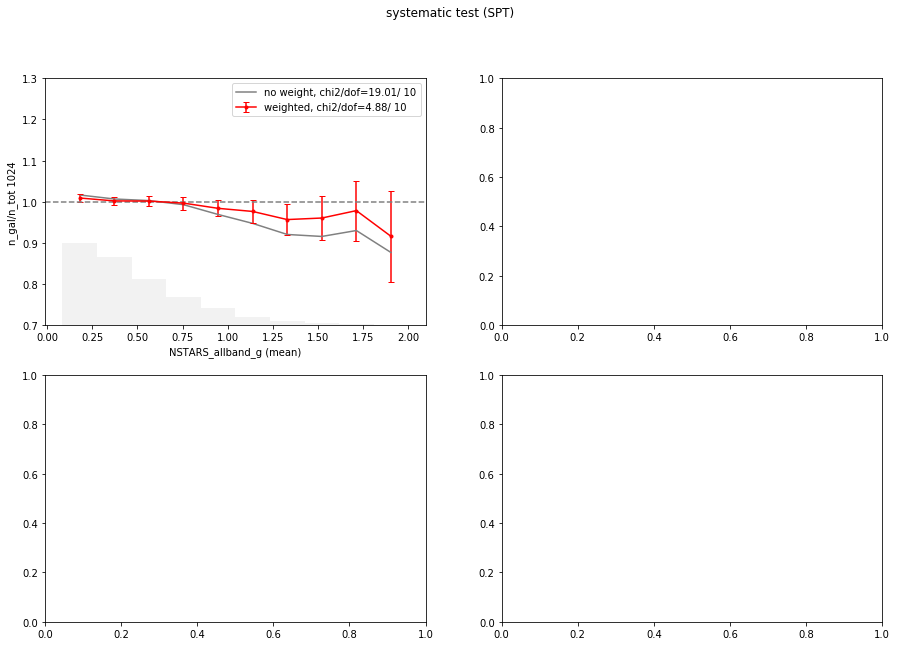

In [59]:
from run_systematics import plot_sysweight
for pr in properties + ['GE', 'NSTARS_allband']:
    plot_sysweight(property = pr, nside = 4096, kind = 'SPT', 
               suffix1='vetoed', suffix2=suf, inputdir1 = sysoutdir, inputdir2 = sysoutdir, outdir=figoutdir)



In [205]:
weightslist = [fitsio.read(wdir+'wg_'+o+'_SPT.fits') for o in order]
#all_weight = np.ones(weightslist[0].size)

In [345]:
maskedGoldMask_spt = maskingCatalogSP(catalog=GoldMask_spt, sysMap=sysMap)

6153627 6030163
mask  0.9799363854845281


In [346]:
dmass_masked = maskingCatalogSP(catalog=dmass, sysMap=sysMap)

6777228 6641688
mask  0.9800006728414626


In [ ]:
`

In [ ]:
#angular_correlation(data = dmass[pcut], rand = rand2, nbins=10, weight = [True, None], njack = 100, 
#                        suffix = '_dmass_no_weight_nbins10_jk100', dir = basedir)

In [206]:
randind = np.random.choice( dmass_masked.size, size = dmass_masked.size/10)
dmass_sam = dmass_masked[randind]

pcut2 = (dmass_sam['EachProb_CMASS'] > 0.01)
angular_correlation(data = dmass_sam[pcut2], rand = rand_masked, 
                    nbins=10, weight = [True, None], njack = 50, 
                    suffix = '_dmass_vetoed_nbins10_jk100', dir = basedir)

calculate angular correlation function
X (515, 2)  centers (50, 2)  tol=1e-05  maxiter=200
11 iterations  cluster sizes: [11 12  9 16 20  6  7  6  9 10  9 15 17  7  4  6 20  5 19 12 11  9  3 10
 17 10  3  6  6  1  9  7 17 10 14  7 18 10 19 16  5  7  2 10  3 11 11 26
  7 10]
X (66538, 2)  centers (50, 2)  tol=1e-05  maxiter=200
131 iterations  cluster sizes: [1531 1580 1555 1198 1601 1368 1350 1057 1781  885 1273 1323 1276 1561
  764 1688 1725 1161 1538 1262 1640 1531 1400 1252 1103 1675 1119 1019
 1880 1145 1403 1434 1752  707 1439  815 1935 1751  560 1554  828 1581
 1013  972 1129 1310  990 1563 1112 1449]
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

KeyboardInterrupt: 

In [222]:
dmass['EachProb_CMASS'] * dmass['WEIGHT_SYS']

masked_array(data=[3.346542990984204e-11, 3.6290284011733945e-11,
                   2.722857526375538e-10, ..., 0.005455324922035217,
                   9.489087913019434e-11, 2.40002541031723e-07],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

In [223]:
all_weight

array([4.72085163e-06, 5.46449689e-06, 1.41742377e-05, ...,
       7.72475137e-02, 1.19393022e-05, 4.90540888e-04])

In [298]:
randind = np.random.choice( dmass.size, size = dmass.size/10)
dmass['WEIGHT'] = dmass['WEIGHT_SYS'].copy()
dmass_sam = dmass[randind]

pcut2 = (dmass_sam['EachProb_CMASS'] > 0.01)
angular_correlation(data = dmass_sam[pcut2], rand = maskedGoldMask_spt, 
                    nbins=10, weight = [True, None], njack = 50, 
                    suffix = '_dmass_all_weight_pcut01_nbins10_jk100', dir = basedir)

calculate angular correlation function
X (525, 2)  centers (50, 2)  tol=1e-05  maxiter=200
18 iterations  cluster sizes: [ 6 15 11 11  4  9 15  6  4 12 17 10 13 10 15 15 11 11  5 17 10  8  4 16
 11 15 12 12  7 16 10 10 13  6  6  8 10  6 10 16  5  9 12 17  6 11  9 16
  6 11]
X (68921, 2)  centers (50, 2)  tol=1e-05  maxiter=200
38 iterations  cluster sizes: [1288 1316 1544 1421 1304 1266 1389 1416 1350 1441 1560 1453 1571 1084
 1073 1653 1327 1624  866 1840 1609 1287 1195 1420 1376 1536 1454 1472
 1559 1426 1554 1196 1471 1571 1451 1371 1427 1038 1240 1414  602 1350
 1160 1484 1320 1430 1729 1641 1131 1221]


KeyboardInterrupt: 

In [304]:
maskedGoldMask_spt.size, dmass.size

(6030163, 6777228)

In [312]:
randind = np.random.choice( dmass.size, size = dmass.size)
dmass['WEIGHT'] = dmass['CMASS_PROB'] * dmass['WEIGHT_SYS']
dmass_sam = dmass[randind]

pcut2 = (dmass_sam['EachProb_CMASS'] > 0.01)
angular_correlation(data = dmass_sam[pcut2], rand = maskedGoldMask_spt, 
                    nbins=10, weight = [True, None], njack = 50, 
                    suffix = '_dmass_all_weight_pcut01_nbins10_jk100', dir = basedir)

calculate angular correlation function
X (1633, 2)  centers (50, 2)  tol=1e-05  maxiter=200
21 iterations  cluster sizes: [48 40 28 36 28 34 35 44 27 34 32 20 44 18 28 34 35 36 30 45 29 32 13 30
 36 30 32 26 31 28 41 30 43 34 27 24 46 27 31 28 29 31 27 41 39 40 23 30
 30 49]
X (666775, 2)  centers (50, 2)  tol=1e-05  maxiter=200
64 iterations  cluster sizes: [14138 16145 13195 15815 12795 13863 15636 13628 12894 15712 16510  9206
 14843 10529 15365 13610 13322 13411 13179 12680 14304 11277  5706 15374
 13076 13647 12257  8230 10668 13536 14463 12768 15119 13415 11360 14370
 15702 12664 13801 14114 10258 14463 12131 15552 15179 11102 13079 13232
 14049 15403]
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_dmass_all_weight_pcut01_nbins10_jk100.txt


In [306]:
randind = np.random.choice( dmass.size, size = dmass.size)
dmass['WEIGHT'] = dmass['CMASS_PROB'] * dmass['VETO']
dmass_sam = dmass[randind]

pcut2 = (dmass_sam['EachProb_CMASS'] > 0.01)
angular_correlation(data = dmass_sam[pcut2], rand = maskedGoldMask_spt, 
                    nbins=10, weight = [True, None], njack = 50, 
                    suffix = '_dmass_veto_pcut01_nbins10_jk100', dir = basedir)

calculate angular correlation function
X (1653, 2)  centers (50, 2)  tol=1e-05  maxiter=200
21 iterations  cluster sizes: [35 48 41 50 29 33 43 33 36 30 26 26 49 30 31 22 25 51 34 19 36 39 27 21
 31 33 29 29 35 36 38 43 24 15 36 26 38 25 44 34 46 34 21 31 26 37 14 34
 38 42]
X (683718, 2)  centers (50, 2)  tol=1e-05  maxiter=200
75 iterations  cluster sizes: [15426 15231 14818 15757 14954 15003 15881 14960 14115 14049 11844 16237
  5596 15012 15947  8636  7914 14870 15607 13933 16951 15114 14056 11050
 15356 12330 13230 13015 14767 15701  9110 11839  8058 11416 15800 13795
 15545 10743 13010 15537 15320 18198 11093  9727 12091 14332 15742 14216
 17363 13423]
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_dmass_veto_pcut01_nbins10_jk100.txt


In [325]:
np.sum(dmass['CMASS_PROB'] == 0 )

0

In [344]:
randind = np.random.choice( dmass.size, size = dmass.size)
dmass['WEIGHT'] = dmass['CMASS_PROB'] # * dmass['VETO']
dmass_sam = dmass[randind]

pcut2 = (dmass_sam['EachProb_CMASS'] > 0.0)
angular_correlation(data = dmass_sam[pcut2], rand = rand, 
                    nbins=10, weight = [True, None], njack = 50, 
                    suffix = '_dmass_no_weight2_pcut00_nbins10_jk100', dir = basedir)

calculate angular correlation function
X (5206, 2)  centers (50, 2)  tol=1e-05  maxiter=200
52 iterations  cluster sizes: [ 86 130  98 100 112  94 110 153 149  67 100  98 124 114  71  88 117  71
 132 138  89  78 114  88 135 118 109 101 139  62 119  84  89  44 113 179
  84  65  90  95 114 110 131  67 102 127 108 108 141  51]
X (6777228, 2)  centers (50, 2)  tol=1e-05  maxiter=200


KeyboardInterrupt: 

In [390]:

dmass['WEIGHT'] = dmass['CMASS_PROB'] * dmass['WEIGHT_SYS']

angular_correlation(data = dmass, rand = rand2, 
                    nbins=10, weight = [True, None], njack = 100, 
                    suffix = '_dmass_all_weight_pcut01_nbins10_jk100', dir = basedir)

calculate angular correlation function
X (1631, 2)  centers (100, 2)  tol=1e-05  maxiter=200
15 iterations  cluster sizes: [14 16  5 16 18 17  8 16 26 17 25 10 24 16 16 10 27 15 25 19 27 28 22 11
 24 12 21  6 14 16 19  3 24 26 13 23 13 14 16 16 22 20 18 13 15 11 17 21
 16 14 14  8 17 37 28 12 13 15 19 16 19 17 30  2 16  8 25 23 13 22 16 21
 11 16 22  9 21 18  8 15 12 14  9 14  5 19 11  9 21 23 15 13  1 17 22 12
 12  8  9 19]
X (665582, 2)  centers (100, 2)  tol=1e-05  maxiter=200
82 iterations  cluster sizes: [7450 7043 6828 5494 8148 7881 3410 7058 6034 6626 7616 5875 7589 6060
 6674 6085 8825 6631 6480 5784 7227 6963 6017 8112 6793 6222 7529 6611
 6182 5931 6361 5909 7325 6356 7854 6051 6528 6055 7795 6271 6442 6372
 6288 5078 7846 7879 5597 7451 7409 6911 6586 7431 7369 8024 6815 6395
 4288 5996 6253 5524 5556 7093 6108 3600 6140 7512 7215 6624 6701 6703
 7697 6548 6689 7537 6310 6892 5882 6142 8031 6505 7368 6069 6837 6961
 6609 6098 7464 6307 6760 8270 6199 8145 4248 7067 7005 666

In [391]:

dmass['WEIGHT'] = dmass['CMASS_PROB'] # * dmass['VETO']

angular_correlation(data = dmass, rand = rand2, 
                    nbins=10, weight = [True, None], njack = 100, 
                    suffix = '_dmass_veto_pcut01_nbins10_jk100', dir = basedir)


calculate angular correlation function
X (1631, 2)  centers (100, 2)  tol=1e-05  maxiter=200
15 iterations  cluster sizes: [18 12  8 12 19 18  1 22 18 13 11 12 19 27  7 10 18 15 29 11 15 23 18 16
  6 12 29 21 15 25 28 25 16 15 17 30 11 17 22 23 12 11 14 16  8 28 13  8
 10 19 21 15 20 12 24 13 16 16 18 10 11  9 30 16 10 38 11 19 13  8 10 17
 15 19 16 27 28 12  9 16  9 29 15 22 12 13 10 14 14 13 11 26 16 13 23  9
 24  9 12 15]
X (665582, 2)  centers (100, 2)  tol=1e-05  maxiter=200
50 iterations  cluster sizes: [6319 6347 5652 6298 6719 6176 2595 6488 6386 5654 6503 7253 7869 9348
 6732 8434 5983 7158 8704 5131 6358 6813 7022 7927 3550 6991 7662 7030
 7450 8690 7905 9134 7041 7527 7856 8165 5075 6098 8158 6973 6177 6985
 6795 6648 4632 8241 8969 6286 6125 8248 4531 5525 7712 3380 8533 7197
 6839 6904 8045 4465 6193 7603 5276 6848 5880 9322 4380 7115 5461 6921
 2909 5965 7742 6216 6424 6745 7009 5850 6464 6559 6833 7322 6707 9263
 6792 7737 7638 7879 4638 4906 7015 5549 5261 7438 7625 515

In [385]:
dmass['WEIGHT'] = dmass['CMASS_PROB'] * dmass['VETO']
#pcut2 = (dmass['CMASS_PROB'] > 0.01)

from systematics_module.corr import angular_correlation_poisson
angular_correlation_poisson(data = dmass, rand = rand2, 
                    nbins=10, weight_data = True, 
                    suffix = '_dmass_no_veto_pcut01_nbins10_jk100', dir = basedir)

saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_no_veto_pcut01_nbins10_jk100.txt


In [387]:
#mass_masked['WEIGHT'] = dmass_masked['CMASS_PROB'] * dmass_masked['WEIGHT_SYS']
dmass['WEIGHT'] = dmass['CMASS_PROB'] * dmass['WEIGHT_SYS']
#pcut2 = (dmass['CMASS_PROB'] > 0.01)

from systematics_module.corr import angular_correlation_poisson
angular_correlation_poisson(data = dmass, rand = rand2, 
                    nbins=10, weight_data = True, 
                    suffix = '_dmass_all_weight_pcut01_nbins10_jk100', dir = basedir)

saving data file to :  ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_poisson_dmass_all_weight_pcut01_nbins10_jk100.txt


In [388]:
#tree corr
from systematics_module.corr import angular_correlation
basedir = inputdir+'/act/'
os.system('mkdir '+inputdir+'/act/')

pcut1 = (dmass['EachProb_CMASS'] > 0.01)
pcut2 = (dmass_masked['EachProb_CMASS'] > 0.01)


#angular_correlation(data = dmass[pcut1], rand = rand2, 
#                    nbins=10, weight = [True, None], njack = 100, 
#                    suffix = '_dmass_no_weight_nbins10_jk100', dir = basedir)

#angular_correlation(data = dmass_masked[pcut2], rand = rand2_masked, nbins=10, 
#                    weight = [True, None], njack = 100, 
#                    suffix = '_dmass_vetoed_nbins10_jk100', dir = basedir)


weight_com = dmass['CMASS_PROB']

print 'initial', np.sum(dmass['WEIGHT'][pcut1]), np.sum(dmass['EachProb_CMASS'][pcut1])
for i in range(1,len(weightslist)+1):
    
     
    #for w in weightslist[:i]: weight_com *= w
    print i, order[i-1],
    weight_com *= weightslist[i-1]
    dmass['WEIGHT'] = weight_com
    
    #dmass_m = maskingCatalogSP(catalog=dmass, sysMap=sysMap)
    
    
    
    randind = np.random.choice( dmass.size, size = dmass.size)
    dmass_m = dmass[randind]
    pcut = (dmass_m['EachProb_CMASS'] > 0.01)
    
    angular_correlation(data = dmass_m[pcut], rand = rand_masked, nbins=10, weight = [True, None], njack = 50, 
                        suffix = '_dmass_weight'+str(i)+'_nbins10_jk100', dir = basedir)
    

initial 114774.39081275917 114200.33709136744
1 fwhm_r

ValueError: operands could not be broadcast together with shapes (665582,) () (6777228,) 

In [ ]:
ls ../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act//acf_auto_dmass_weight

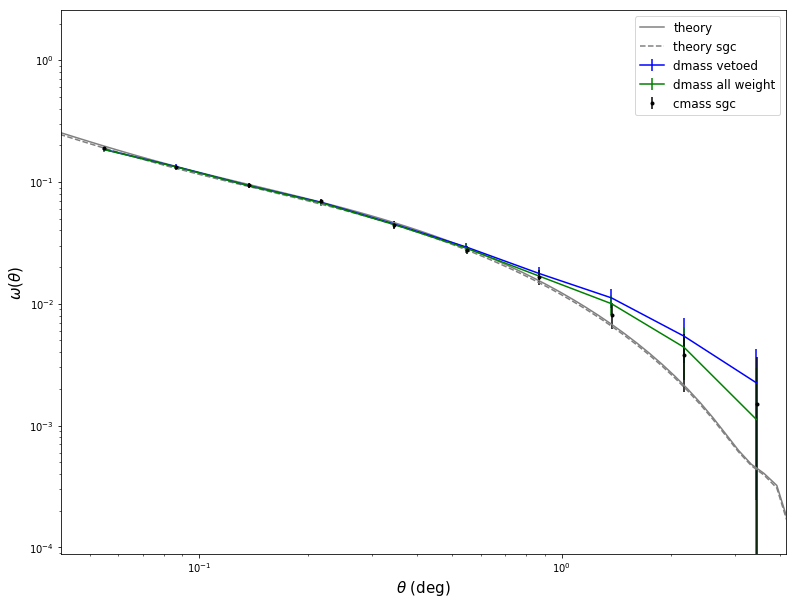

In [392]:
import scipy

theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)

#_, theory_bias = np.loadtxt('../data_txt/acf_cmass_sgc_theory_bias.txt', unpack=True)
#meanr, xi, xi_err = np.loadtxt(rootdir+'/act//acf_auto_gold_st82_nbins10_jk100.txt', unpack=True)
meanr, xi, xi_err = np.loadtxt(rootdir+'/act//acf_auto_poisson_dmass_no_weight2_pcut01_nbins10_jk100.txt', unpack=True)
meanr2, xi2, xi_err2 = np.loadtxt(rootdir+'/act//acf_auto_dmass_veto_pcut01_nbins10_jk100.txt', unpack=True)
meanr3, xi3, xi_err3 = np.loadtxt(rootdir+'/act//acf_auto_dmass_all_weight_pcut01_nbins10_jk100.txt', unpack=True)

theory_interp = scipy.interpolate.interp1d(theta_th, theory)
theory_interp = theory_interp(meanr)
theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
theory_sgc_interp = theory_sgc_interp(meanr)

nzs_ratio = theory_sgc_interp/theory_interp


meanr_sgc, xi_sgc, xi_err_sgc = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt',unpack=True)
cov_cmass_s = np.genfromtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.cov')




fig, ax = plt.subplots(figsize = (13, 10))


#ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='r', label='dmass no weight')
ax.errorbar(meanr2, xi2, yerr = xi_err2, fmt = '-', color='b', label='dmass vetoed')
ax.errorbar(meanr3, xi3, yerr = xi_err3, fmt = '-', color='g', label='dmass all weight')
ax.errorbar(meanr_sgc, xi_sgc, yerr = xi_err_sgc, fmt = 'k.', color='r', label='cmass sgc')

ax.plot(theta_th, theory, '-', color='grey', label='theory')
ax.plot(theta_th, theory_sgc, '--', color='grey', label='theory sgc')
#ax.plot(theta_th, theta_th*theory_bias, '--', color='green', label='theory bias')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
#ax.text(1.5, 0.07, r'$\chi^2 $ = {:0.3f}  (south)'.format(chisqr), fontsize = 12)
#ax.set_ylim(1e-4,1)
ax.set_xlim(2.5/60, 250./60)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega(\theta)$', fontsize = 15)

In [1]:
order

NameError: name 'order' is not defined

../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_all_weight_pcut01_nbins10_jk100.txt
err db, db / br1, brmin, br2 : 0.02432893052922669 0.016165154856815356 0.9958907368140013 1.0081484378079106 1.020219667343228
../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_veto_pcut01_nbins10_jk100.txt
err db, db / br1, brmin, br2 : 0.026136292476463208 0.011463003569439634 0.9926313834514213 1.0057645412632583 1.0187676759278845
../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_weight1_nbins10_jk100.txt
err db, db / br1, brmin, br2 : 0.06165451544507072 -0.04282557304745227 0.9477233963172933 0.9790361088031779 1.009377911762364
../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_weight2_nbins10_jk100.txt
err db, db / br1, brmin, br2 : 0.10038170161588855 -0.024072470460916318 0.9366405175369141 0.9881069127651172 1.0370222191528027
../output/sfd_train_photo_SamPle_nozband_r

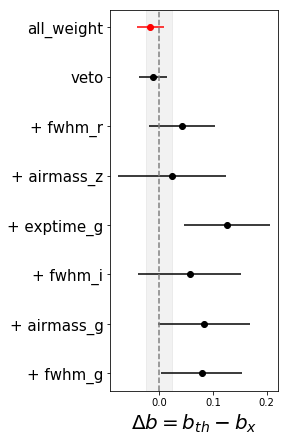

In [394]:
from systematics import brel_chisqr_fitting
import scipy


theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)
theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
#theory_sgc_interp = theory_sgc_interp(meanr)

fig, ax = plt.subplots(figsize = (3,7))
brelsqr = np.linspace(0.1, 1.9, 5000) 
b_n = 2.0
brelarr = np.sqrt(brelsqr)
dbarray = b_n*(1-brelarr)

labels_SP = ['all_weight', 'veto'] + ['+ '+o for o in order ]

filenames = [ basedir+ 'acf_auto_dmass_all_weight_pcut01_nbins10_jk100.txt', \
              basedir + 'acf_auto_dmass_veto_pcut01_nbins10_jk100.txt'
            ] \
+[ basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.txt' for j in range(1, len(labels_SP))]

covnames = [ basedir+ 'acf_auto_dmass_all_weight_pcut01_nbins10_jk100.cov', \
              basedir + 'acf_auto_dmass_veto_pcut01_nbins10_jk100.cov'
           ] \
+[ basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.cov' for j in range(1, len(labels_SP))]


for j in range(1, len(labels_SP)+1):
#for j in [1,7]:
    
    print filenames[j-1]
    meanrw, xiw, xi_errw = np.loadtxt( filenames[j-1], unpack=True)
    cov_dmass_w = np.loadtxt( covnames[j-1], unpack=True)
    #meanrw, xiw, xi_errw = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.txt', unpack=True)
    #cov_dmass_w = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.cov', unpack=True)
    HFd = 1.0 #HF(100, 10)
    F_d = HFd * np.linalg.inv(cov_dmass_w)
    err_brelw, brelw, chisqr_resultw = brel_chisqr_fitting(xiw, theory_sgc_interp(meanrw), F_d, verbose=True)
    if j == 1 : 
        color = 'red'
        #ax.axvspan(2.-2*brelw - err_brelw*2., 2.-2*brelw + err_brelw*2.,  alpha=0.1, color='grey')
        #ax.axvline(x=2.-2*brelw, color = 'grey', ls='--')
        ax.axvspan(- err_brelw*2.,  err_brelw*2.,  alpha=0.1, color='grey')
        ax.axvline(x=0, color = 'grey', ls='--')
    else : color = 'k'  
        
    ax.errorbar(2.-2*brelw, len(labels_SP)+1-j, xerr =err_brelw*2., fmt='-o', color=color)
    
ax.set_xlabel(r'$\Delta b = b_{th} - b_x$', fontsize = 20)
#ax.set_ylabel(r'$\chi^2$')
ax.legend(loc=1)
#ax.set_xlim(-0.1+0.02, 0.1+0.02)
#ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_yticks(np.arange(1, len(labels_SP)+1 ))

labels = labels_SP[::-1]
ax.set_yticklabels( labels, fontsize = 15) 
fig.savefig(figoutdir + 'sys_bias_weight.png')
print 'pic save to ', figoutdir + 'sys_bias_weight.png'



